In [ ]:
'''
Walmart Inc., a multinational retail corporation, aims to analyze customer purchase behavior,
specifically comparing spending habits between male and female customers during Black Friday.
The goal is to understand potential differences in purchase amounts based on various factors to make informed business decisions.

2. Business Problem:

The management team at Walmart Inc. seeks to answer whether spending habits differ between male and female customers during Black Friday.
The specific query is: "Do women spend more on Black Friday than men?" With an assumption of 50 million male and 50 million female customers,
the company desires insights into gender-based purchase behavior.


'''

'\nWalmart Inc., a multinational retail corporation, aims to analyze customer purchase behavior,\nspecifically comparing spending habits between male and female customers during Black Friday.\nThe goal is to understand potential differences in purchase amounts based on various factors to make informed business decisions.\n\n2. Business Problem:\n\nThe management team at Walmart Inc. seeks to answer whether spending habits differ between male and female customers during Black Friday.\nThe specific query is: "Do women spend more on Black Friday than men?" With an assumption of 50 million male and 50 million female customers,\nthe company desires insights into gender-based purchase behavior.\n\n\n'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from scipy.stats import norm

In [ ]:
#walmart colour codes
walmart_blue = "#0072CE"
walmart_yellow = "#FFCB05"
complementary_colors = ["#FF6F61", "#6B5B95", "#88B04B"]
colors = [walmart_blue, walmart_yellow] + complementary_colors
sns.set_palette(sns.color_palette(colors))

In [ ]:
'''
test = pd.read_excel("test.xlsx", sheet_name = ["Sheet1", "Sheet2"])
type(test)
'''

'\ntest = pd.read_excel("test.xlsx", sheet_name = ["Sheet1", "Sheet2"])\ntype(test)\n'

In [ ]:
!gdown 1dzwtcKQkBQXa27Lg-EVTDvw8VRf3EhBf

Downloading...
From: https://drive.google.com/uc?id=1dzwtcKQkBQXa27Lg-EVTDvw8VRf3EhBf
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 54.1MB/s]


In [ ]:
df1 = pd.read_csv("walmart_data.csv")

In [ ]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df1.shape

(550068, 10)

In [ ]:
#Analyzing basic metrics
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#Analyzing basic metrics
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
#Non-Graphical Analysis: Value counts and unique attributes ​
df1.describe(include = "object").T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


In [ ]:
#conversion of categorial data into category
df1.loc[df1["Marital_Status"] == 0, "Partnered"] = "S"
df1.loc[df1["Marital_Status"] == 1, "Partnered"] = "P"

In [ ]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Partnered
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,S
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,S
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,S
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,S
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,S


In [ ]:
df1["User_ID"].nunique()

5891

In [ ]:
# total number of unique users/customers = 5891

In [ ]:
df1["Product_ID"].nunique()

3631

In [ ]:
# total unique products = 3631

In [ ]:
df1["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

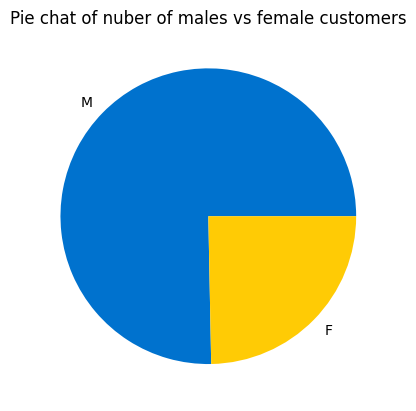

In [ ]:
gender_counts = df1["Gender"].value_counts(normalize=True)
plt.pie(gender_counts * 100, labels=gender_counts.index)
plt.title("Pie chat of nuber of males vs female customers")
plt.show()

In [ ]:
# purchases made by male customers amount to around 75% of the total sales

In [ ]:
'''
sns.countplot(df1, x = "Gender")
plt.title("Count of Female vs Male Users")
plt.show()
'''

'\nsns.countplot(df1, x = "Gender")\nplt.title("Count of Female vs Male Users")\nplt.show()\n'

In [ ]:
df1["Age"].value_counts(normalize = True)*100

26-35    39.919974
36-45    19.999891
18-25    18.117760
46-50     8.308246
51-55     6.999316
55+       3.909335
0-17      2.745479
Name: Age, dtype: float64

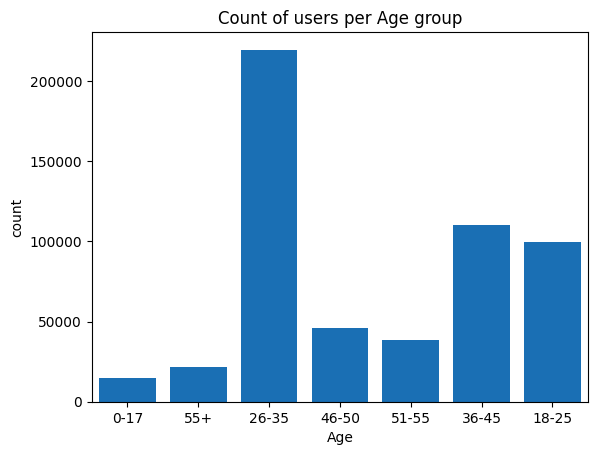

In [ ]:
#Age
sns.countplot(df1, x = "Age")
plt.title("Count of users per Age group")
plt.show()

In [ ]:
# around 39% of the customer demographic belong to the age category of 26-35, followed by 36-45 amounting to 20%.

In [ ]:
df1["City_Category"].value_counts(normalize = True)*100

B    42.026259
C    31.118880
A    26.854862
Name: City_Category, dtype: float64

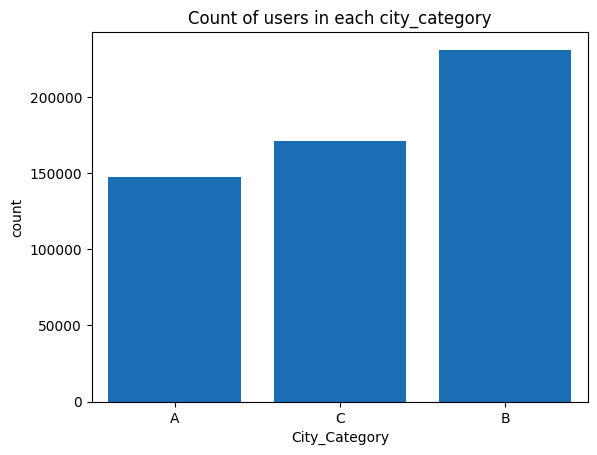

In [ ]:
sns.countplot(df1, x = "City_Category")
plt.title("Count of users in each city_category")
plt.show()

In [ ]:
# most of the customers are based of off B city category, closly followed by C and A.

In [ ]:
df1["Stay_In_Current_City_Years"].value_counts(normalize = True)*100

1     35.235825
2     18.513711
3     17.322404
4+    15.402823
0     13.525237
Name: Stay_In_Current_City_Years, dtype: float64

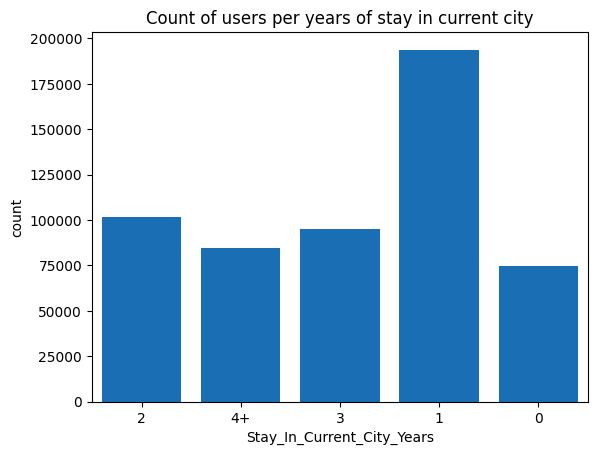

In [ ]:
#Stay_In_Current_City_Years

sns.countplot(df1, x = "Stay_In_Current_City_Years")
plt.title("Count of users per years of stay in current city")
plt.show()

In [ ]:
# most of the customers have lived in the current city for a year,
# which can be traced back to the age demographic as most customers also belong to the age group 26-35,
# meaning most customers are prople who are on the move.

In [ ]:
df1["Marital_Status"].value_counts(normalize = True)*100

0    59.034701
1    40.965299
Name: Marital_Status, dtype: float64

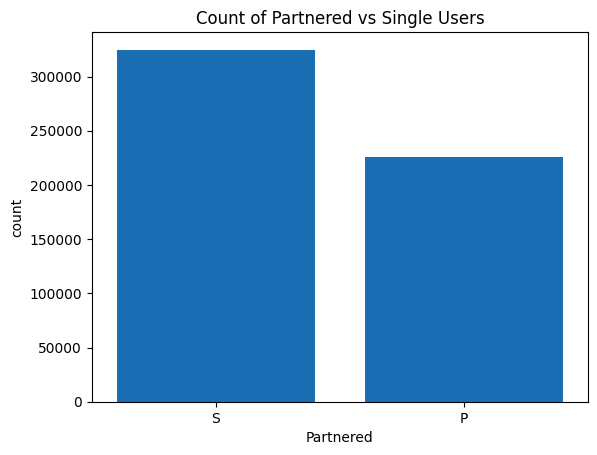

In [ ]:
sns.countplot(df1, x = "Partnered")
plt.title("Count of Partnered vs Single Users")
plt.show()

In [ ]:
# around 60% of the customer demograph are single or unpartnered.

In [ ]:
df1["Occupation"].value_counts(normalize = True)*100

4     13.145284
0     12.659889
7     10.750125
1      8.621843
17     7.279645
20     6.101427
12     5.668208
14     4.964659
2      4.833584
16     4.612339
6      3.700452
3      3.208694
10     2.350618
5      2.213726
15     2.211545
11     2.106285
19     1.538173
13     1.404917
18     1.203851
9      1.143677
8      0.281056
Name: Occupation, dtype: float64

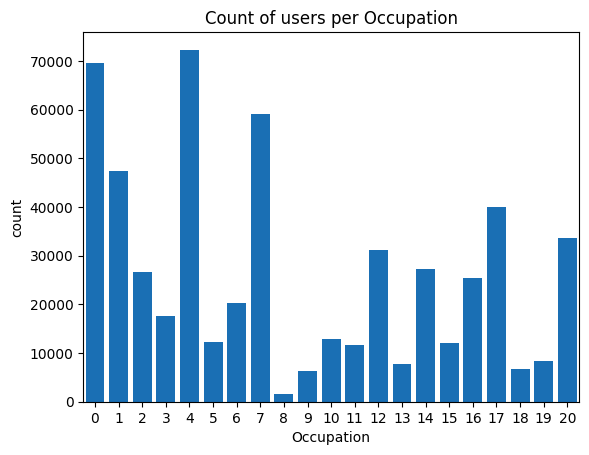

In [ ]:
#Occupation
sns.countplot(df1, x = "Occupation")
plt.title("Count of users per Occupation")
plt.show()

In [ ]:
df_occ = df1.groupby("Occupation")["Purchase"].mean()

In [ ]:
df_occ  = df_occ.reset_index()

In [ ]:
df_occ.sort_values("Purchase", ascending = False)

,Occupation,Purchase
17,17,9821.478236
12,12,9796.640239
15,15,9778.891163
8,8,9532.592497
14,14,9500.702772
7,7,9425.728223
16,16,9394.464349
5,5,9333.149298
13,13,9306.351061
6,6,9256.535691


In [ ]:
df1.groupby(["Occupation", "Gender"])["Gender"].count()

Occupation  Gender
0           F         18112
            M         51526
1           F         17984
            M         29442
2           F          8629
            M         17959
3           F          7919
            M          9731
4           F         17836
            M         54472
5           F          2220
            M          9957
6           F          8160
            M         12195
7           F         10028
            M         49105
8           F           361
            M          1185
9           F          5843
            M           448
10          F          4003
            M          8927
11          F          1500
            M         10086
12          F          3469
            M         27710
13          F          1498
            M          6230
14          F          6763
            M         20546
15          F          2390
            M          9775
16          F          4107
            M         21264
17          F          3929
 

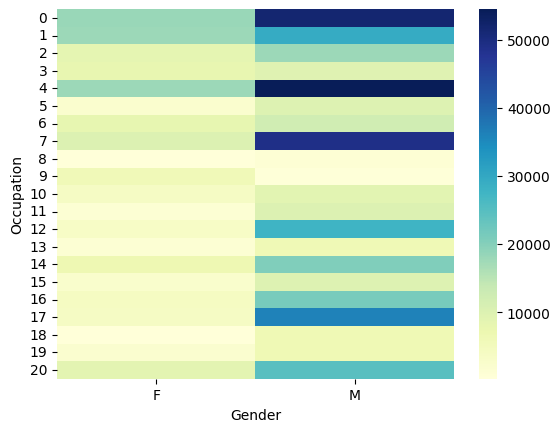

In [ ]:
pd.crosstab(df1["Occupation"], df1["Gender"])

sns.heatmap(pd.crosstab(df1["Occupation"], df1["Gender"]),cmap='YlGnBu')
plt.show()

In [ ]:
'''
Occupations with highest mean purchase values are 17, 12,	15,	8,	14,	7

Popular male occuaptions are : 0, 1, 4, 7, 12, 14, 16, 17, 20
Popular female occupations are : 0, 1, 4

we can draw that a correlation that jobs with high pays will have high mean purchases values as the
job provides more purchase power, and our male demographic shows that they have occupations that span over high mean purchase values,
those occuaptions also adds to the factor that males may have  higher purchase value than that of in this dataset

'''

'\nOccupations with highest mean purchase values are 17, 12,\t15,\t8,\t14,\t7\n\nPopular male occuaptions are : 0, 1, 4, 7, 12, 14, 16, 17, 20\nPopular female occupations are : 0, 1, 4\n\nwe can draw that a correlation that jobs with high pays will have high mean purchases values as the\njob provides more purchase power, and our male demographic shows that they have occupations that span over high mean purchase values,\nthose occuaptions also adds to the factor that males may have  higher purchase value than that of in this dataset\n\n'

In [ ]:
df1["Product_Category"].value_counts(normalize = True)*100

5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: Product_Category, dtype: float64

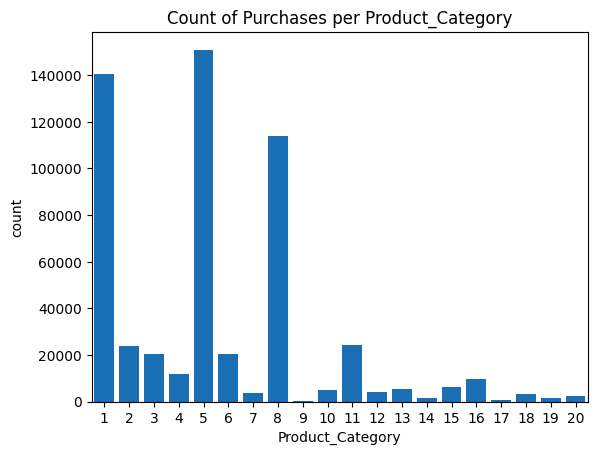

In [ ]:
#Product_Category
sns.countplot(df1, x = "Product_Category")
plt.title("Count of Purchases per Product_Category")
plt.show()

In [ ]:
# most popular product category is 5 followed by 1, 8 and 11.

In [ ]:
df1["Purchase"].mean()

9263.968712959126

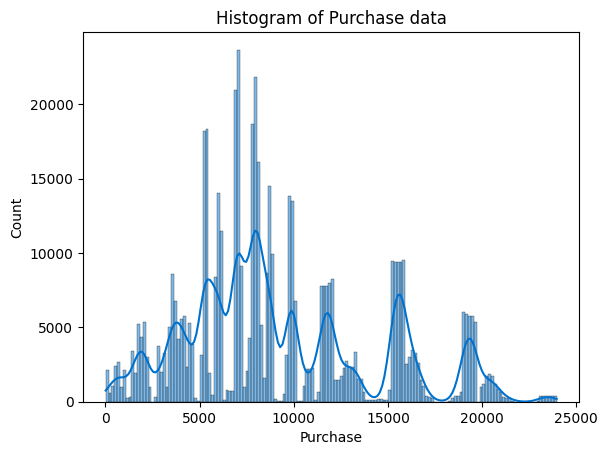

In [ ]:
sns.histplot(df1, x = "Purchase", kde = "True")
plt.title("Histogram of Purchase data")
plt.show()

In [ ]:
'''
the histogram of purchase data shows that most of the purchases are of amount roughly between 5000 and 10000,
but the graph has a right tail that spreads out till 250000
'''

'\nthe histogram of purchase data shows that most of the purchases are of amount roughly between 5000 and 10000,\nbut the graph has a right tail that spreads out till 250000\n'

In [ ]:
df_m = df1.loc[df1["Gender"]== "M"]
df_f = df1.loc[df1["Gender"]== "F"]

In [ ]:
mean_purchase = df_m["Purchase"].mean()
print("Mean Purchase :", mean_purchase)

Mean Purchase : 9437.526040472265


In [ ]:
df_f["Purchase"].mean()

8734.565765155476

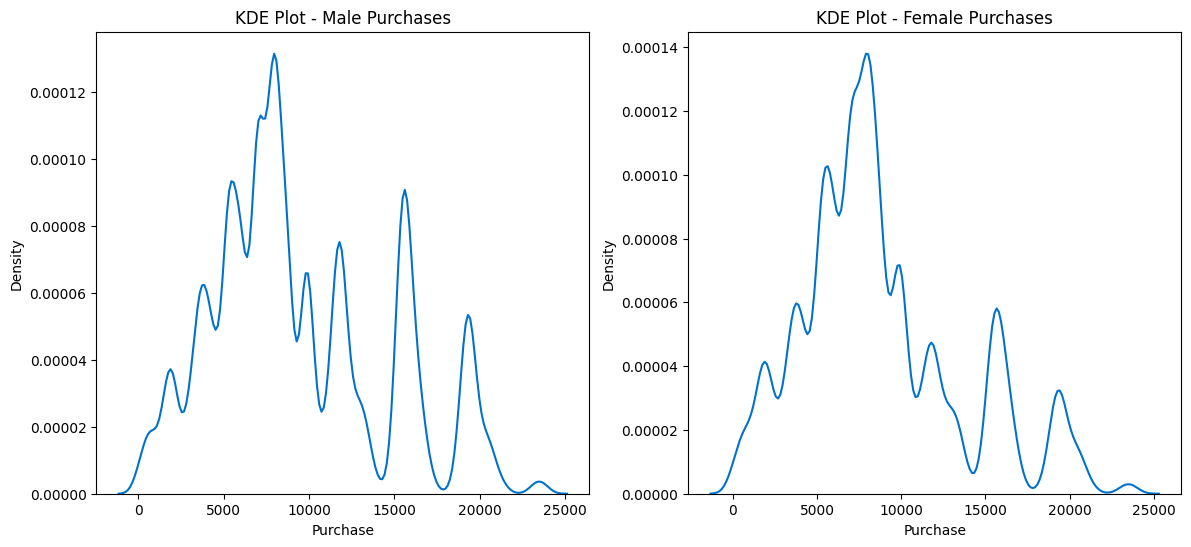

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.kdeplot(data=df_m, x="Purchase", ax=axes[0], label='Male Purchases')
axes[0].set_title('KDE Plot - Male Purchases')
sns.kdeplot(data = df_f, x = "Purchase", ax = axes[1], label = "Female Purchase")
axes[1].set_title('KDE Plot - Female Purchases')
plt.show()

In [ ]:
# KDE plots of purchase values of male and female customer follows a similar trend

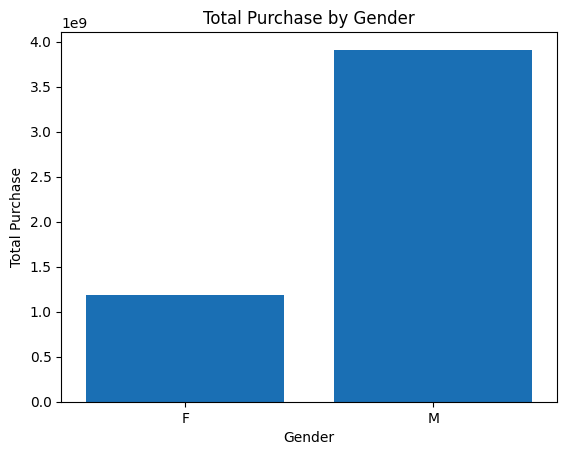

In [ ]:
purchase_totals = df1.groupby('Gender')['Purchase'].sum().reset_index()
sns.barplot(data=purchase_totals, x='Gender', y='Purchase')
plt.xlabel('Gender')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Gender')
plt.show()

In [ ]:
#As the population of male customers is around 75% it also shows its impact on the sales made on male customers

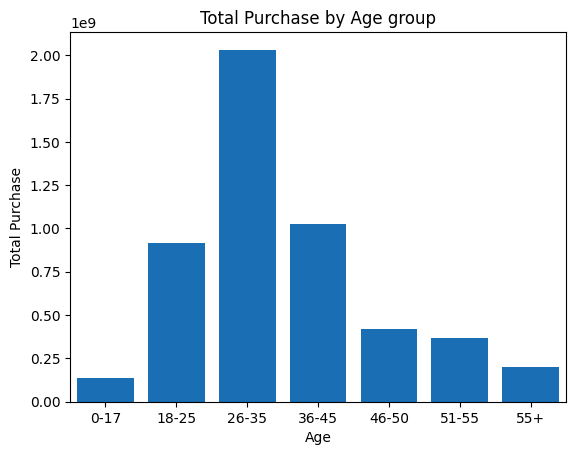

In [ ]:
purchase_totals = df1.groupby('Age')['Purchase'].sum().reset_index()
sns.barplot(data=purchase_totals, x='Age', y='Purchase')
plt.xlabel('Age')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Age group')
plt.show()

In [ ]:
'''
in this graph too, we can see a strong correlation between population in a particular age group
and the total purchase amount of that age group
'''

'\nin this graph too, we can see a strong correlation between population in a particular age group\nand the total purchase amount of that age group\n'

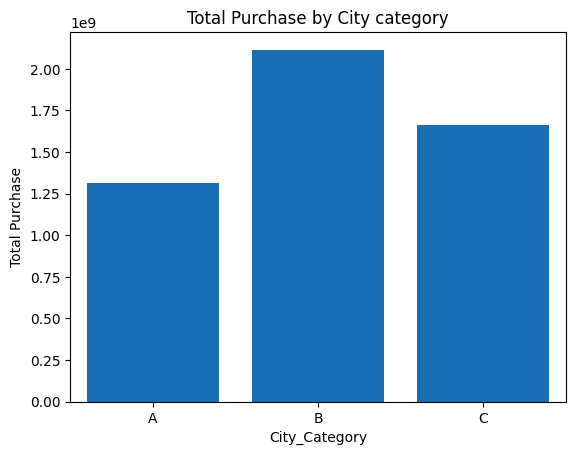

In [ ]:
purchase_totals = df1.groupby('City_Category')['Purchase'].sum().reset_index()
sns.barplot(data=purchase_totals, x='City_Category', y='Purchase')
plt.xlabel('City_Category')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by City category')
plt.show()

In [ ]:
# same trend is also followed in the city category

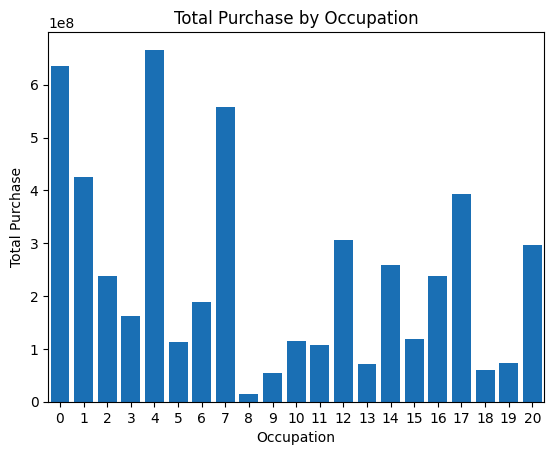

In [ ]:
purchase_totals = df1.groupby('Occupation')['Purchase'].sum().reset_index()
sns.barplot(data=purchase_totals, x='Occupation', y='Purchase')
plt.xlabel('Occupation')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Occupation')
plt.show()

In [ ]:
# same trend is also followed in the occupation

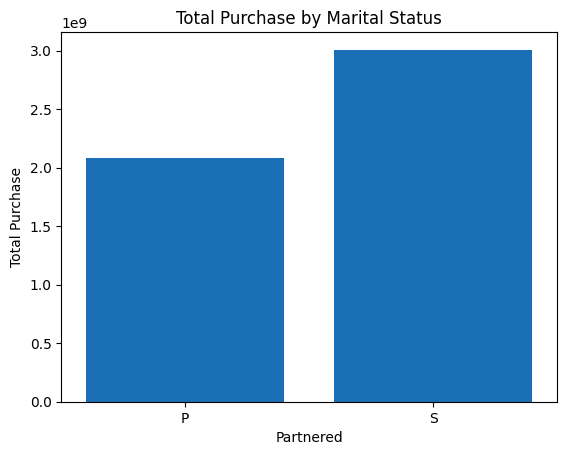

In [ ]:
purchase_totals = df1.groupby('Partnered')['Purchase'].sum().reset_index()
sns.barplot(data=purchase_totals, x='Partnered', y='Purchase')
plt.xlabel('Partnered')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Marital Status')
plt.show()

In [ ]:
# same trend follows through marital status too

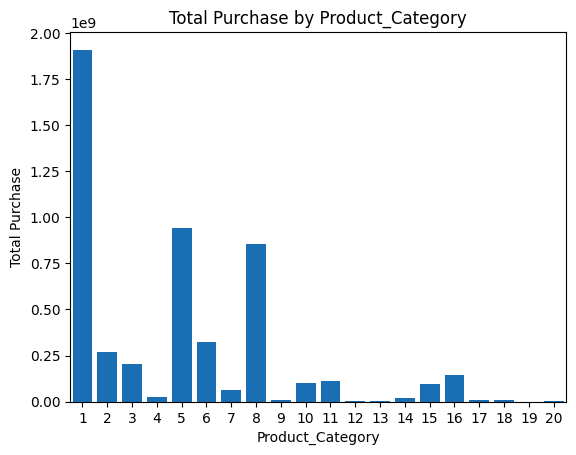

In [ ]:
purchase_totals = df1.groupby('Product_Category')['Purchase'].sum().reset_index()
sns.barplot(data=purchase_totals, x='Product_Category', y='Purchase')
plt.xlabel('Product_Category')
plt.ylabel('Total Purchase')
plt.title('Total Purchase by Product_Category')
plt.show()

In [ ]:
'''
most popular product category is 5 followed by 1, 8 and 11 but the most revenue generating product
category belongs to 1, then seeing a significant drop of value to product category 5 and 8.
'''

'\nmost popular product category is 5 followed by 1, 8 and 11 but the most revenue generating product\ncategory belongs to 1, then seeing a significant drop of value to product category 5 and 8.\n'

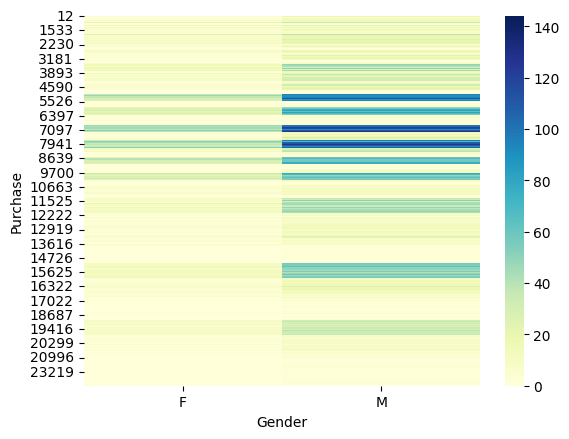

In [ ]:
gender_purchase = pd.crosstab(df1["Purchase"], df1["Gender"])
sns.heatmap(gender_purchase,cmap='YlGnBu')
plt.show()

In [ ]:
'''
heatmap showcases the sales generated within each gender group, it is evident
that male customers have made more number of purchases in
the price range of 4590 - 9700, 11500 - 12200 and 15500 - 16300 than that of female purchases
'''

'\nheatmap showcases the sales generated within each gender group, it is evident\nthat male customers have made more number of purchases in\nthe price range of 4590 - 9700, 11500 - 12200 and 15500 - 16300 than that of female purchases\n'

In [ ]:
purchase_totals_PC_G = df1.groupby('Product_Category')['Gender'].value_counts()
purchase_totals_PC_G

Product_Category  Gender
1                 M         115547
                  F          24831
2                 M          18206
                  F           5658
3                 M          14207
                  F           6006
4                 M           8114
                  F           3639
5                 M         108972
                  F          41961
6                 M          15907
                  F           4559
7                 M           2778
                  F            943
8                 M          80367
                  F          33558
9                 M            340
                  F             70
10                M           3963
                  F           1162
11                M          19548
                  F           4739
12                M           2415
                  F           1532
13                M           4087
                  F           1462
14                M            900
                  F           

In [ ]:
'''
from the above data we can draw a insight that male customers have brought more products from product_category 1
resulting in higher revenue generated from that demographic.
'''

'\nfrom the above data we can draw a insight that male customers have brought more products from product_category 1\nresulting in higher revenue generated from that demographic.\n'

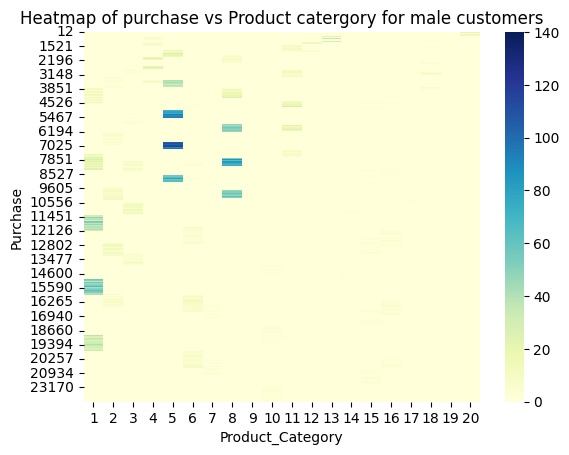

In [ ]:
PC_purchase_m = pd.crosstab(df_m["Purchase"], df_m["Product_Category"])
sns.heatmap(PC_purchase_m,cmap='YlGnBu')
plt.title("Heatmap of purchase vs Product catergory for male customers")
plt.show()

In [ ]:
# Highest male purchases have come from produyct category 5, 8 and 1

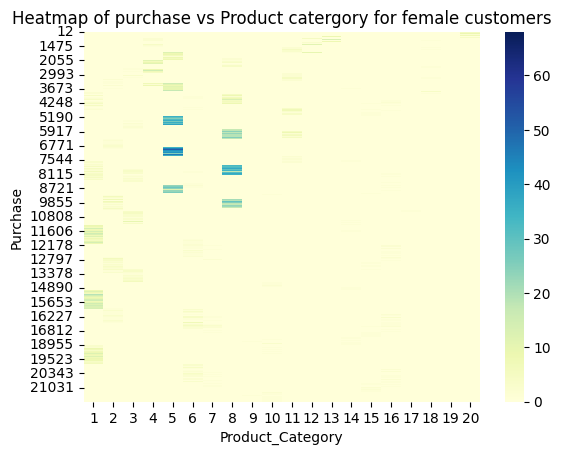

In [ ]:
PC_purchase_f = pd.crosstab(df_f["Purchase"], df_f["Product_Category"])
sns.heatmap(PC_purchase_f,cmap='YlGnBu')
plt.title("Heatmap of purchase vs Product catergory for female customers")
plt.show()

In [ ]:
# Highest female purchases have come from produyct category 5 and 8

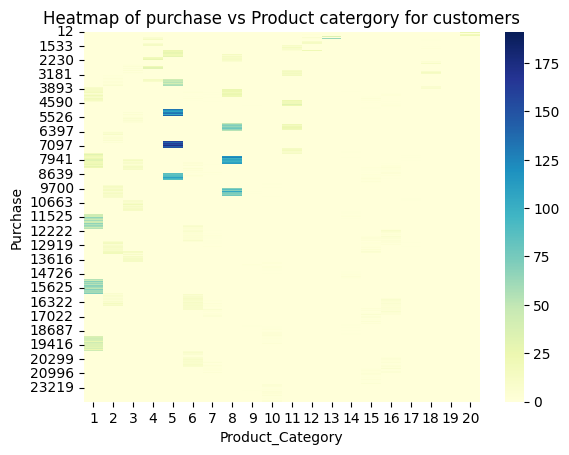

In [ ]:
PC_purchase = pd.crosstab(df1["Purchase"], df1["Product_Category"])
sns.heatmap(PC_purchase,cmap='YlGnBu')
plt.title("Heatmap of purchase vs Product catergory for customers")
plt.show()

In [ ]:
'''
Highest cusrtomer purchases have come from produyct category 5, 8 and 1
we can see that product category 5 and 8 are popular with both genders, while oproduct category 1 is popular
amoung male demograph.
'''

'\nHighest cusrtomer purchases have come from produyct category 5, 8 and 1\nwe can see that product category 5 and 8 are popular with both genders, while oproduct category 1 is popular\namoung male demograph.\n'

In [ ]:
male_pc = [1,5,8]
female_pc = [5,8]

print("The male purchase percentage from product catergory:1,5,8 = " ,(df_m.loc[df_m["Product_Category"].isin(male_pc)]["Purchase"].sum()/df1["Purchase"].sum())*100)
print("The female purchase percentage from product catergory:5,8 = " ,(df_f.loc[df_f["Product_Category"].isin(female_pc)]["Purchase"].sum()/df1["Purchase"].sum())*100)

The male purchase percentage from product catergory:1,5,8 =  55.97136761898697
The female purchase percentage from product catergory:5,8 =  10.132643802710598


In [ ]:
male_pc_1 = [5,8]
print("The male purchase percentage from product catergory:5,8 = " ,(df_m.loc[df_m["Product_Category"].isin(male_pc_1)]["Purchase"].sum()/df1["Purchase"].sum())*100)

The male purchase percentage from product catergory:5,8 =  25.115002037882967


In [ ]:
# male customers contribute 30% to the total purchase from only product category 1

In [ ]:
'''
Product Category Analysis:

Highest female purchases are primarily from product categories 5 and 8.
Highest male purchases are from product categories 5, 8, and 1.
The most significant purchases, across genders, originate from product categories 5, 8, and 1.
Insight: Product categories 5 and 8 are popular with both genders, whereas category 1 is particularly favored among males.
Implication: Males contribute significantly to the revenue from product_category 1, indicating a higher propensity for
purchases in this category compared to females.


'''

'\nProduct Category Analysis:\n\nHighest female purchases are primarily from product categories 5 and 8.\nHighest male purchases are from product categories 5, 8, and 1.\nThe most significant purchases, across genders, originate from product categories 5, 8, and 1.\nInsight: Product categories 5 and 8 are popular with both genders, whereas category 1 is particularly favored among males.\nImplication: Males contribute significantly to the revenue from product_category 1, indicating a higher propensity for\npurchases in this category compared to females.\n\n\n'

<Axes: xlabel='Product_Category', ylabel='Purchase'>

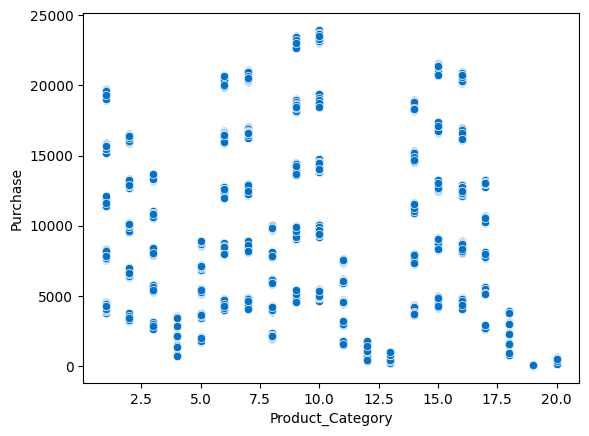

In [ ]:
sns.scatterplot(df1, y = "Purchase", x = "Product_Category")

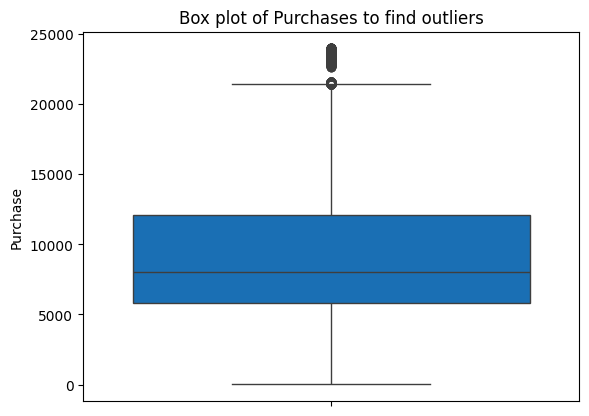

In [ ]:
sns.boxplot(df1, y = "Purchase")
plt.title("Box plot of Purchases to find outliers")
plt.show()

In [ ]:
#outliers(high singular purchases)
df1.loc[df1["Purchase"]>22000, "User_ID"].nunique()

1376

In [ ]:
# 1376 users have made single purchases that are of value greater than 220000

In [ ]:
#top ten outliers
df1.loc[df1["Purchase"]>22000, ["User_ID","Purchase", "Gender"]].sort_values("Purchase", ascending = False).head(10)
# these are few of those high revenue generating users

,User_ID,Purchase,Gender
87440,1001474,23961,M
93016,1002272,23961,M
370891,1003160,23961,M
321782,1001577,23960,M
503697,1005596,23960,M
292083,1003045,23960,M
349658,1005848,23960,M
298378,1003947,23959,M
437804,1001387,23959,F
229329,1005367,23958,M


In [ ]:
df1.loc[df1["Purchase"]>22000, "Product_Category"].value_counts()

10    2275
9       75
Name: Product_Category, dtype: int64

In [ ]:
# These high revenue generating users buy products from product category 10 and 9

In [ ]:
#count of males vs females in outliers

df_purchase_outliers = df1.loc[df1["Purchase"]>22000]
df_purchase_outliers["Gender"].value_counts(normalize = True)*100

M    77.106383
F    22.893617
Name: Gender, dtype: float64

In [ ]:
'''
the trend follows here too as the male demograph occupied 75% of the population, they also occupy around
the same percentage in high revenue generating customers
'''

'\nthe trend follows here too as the male demograph occupied 75% of the population, they also occupy around\nthe same percentage in high revenue generating customers\n'

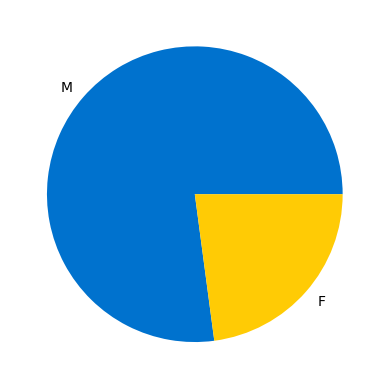

In [ ]:
plt.pie(df_purchase_outliers["Gender"].value_counts(), labels = df_purchase_outliers["Gender"].unique())
plt.show()

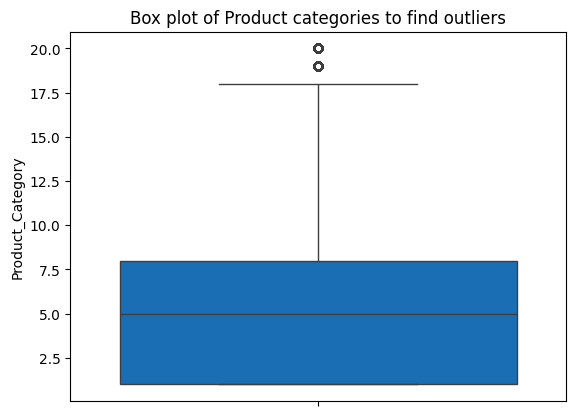

In [ ]:
sns.boxplot(df1, y = "Product_Category")
plt.title("Box plot of Product categories to find outliers")
plt.show()

In [ ]:
#outliers in product category
df_pcat_outliers = df1.loc[df1["Product_Category"] > 18]
#outliers in product category
df_pcat_outliers["Product_Category"].value_counts()

20    2550
19    1603
Name: Product_Category, dtype: int64

In [ ]:
#product categories 19 and 20 are outliers

In [ ]:
(df1.loc[(df1["Product_Category"]== 19) | (df1["Product_Category"]== 20)]["Purchase"].sum()/(df1["Purchase"].sum()))*100

0.019704511347603204

In [ ]:
#product category 19 and 20 contribute only 0.019% in the sales

In [ ]:
((df1["Purchase"].sum() - df1.loc[(df1["Product_Category"]== 19) | (df1["Product_Category"]== 20)]["Purchase"].sum())/ (df1["Purchase"].sum()))*100

99.98029548865239

In [ ]:
#while rest of the product categorys contribute 99.98% in the sales

In [ ]:
df_pcat_outliers["Gender"].value_counts(normalize = True)*100

M    71.731279
F    28.268721
Name: Gender, dtype: float64

In [ ]:
'''
the trend follows here too as the male demograph occupied 75% of the population, they also occupy around
the same percentage in the oulier product category purchases.
'''

'\nthe trend follows here too as the male demograph occupied 75% of the population, they also occupy around\nthe same percentage in the oulier product category purchases.\n'

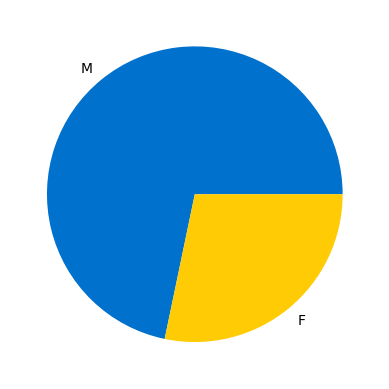

In [ ]:
plt.pie(df_pcat_outliers["Gender"].value_counts(normalize = True), labels =["M", "F"])
plt.show()

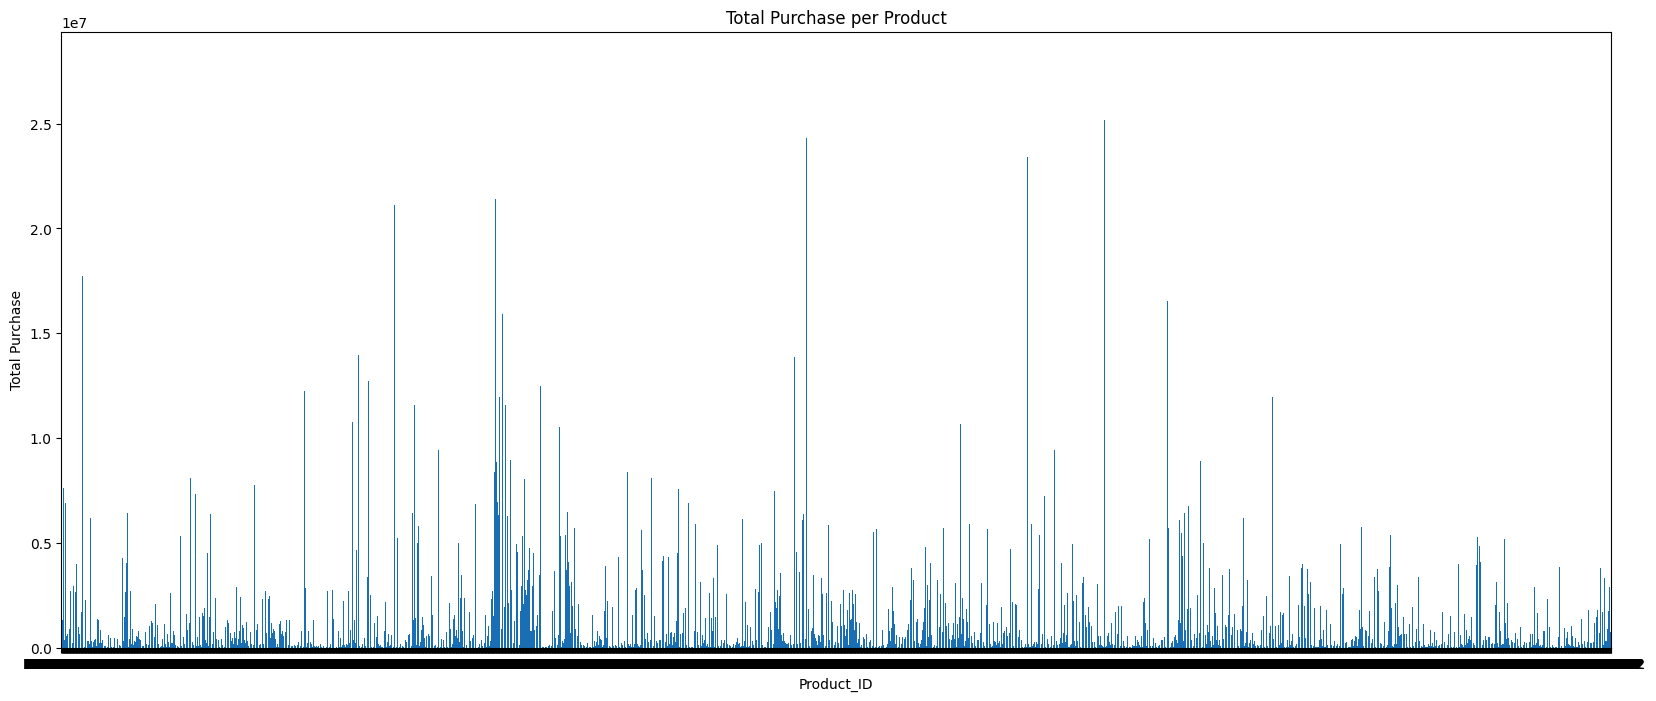

In [ ]:

plt.figure(figsize=[20, 8])
purchase_totals_per_product = df1.groupby('Product_ID')['Purchase'].sum().reset_index()
sns.barplot(data=purchase_totals_per_product, x='Product_ID', y='Purchase')
plt.xlabel('Product_ID')
plt.ylabel('Total Purchase')
plt.title('Total Purchase per Product')
plt.show()


In [ ]:
purchase_totals_per_product["Purchase"].sort_values(ascending = False)

249     27995166
1016    26722309
2443    25168963
582     24338343
1745    24334887
          ...   
125         1717
3117        1656
3389        1545
2962         726
891          405
Name: Purchase, Length: 3631, dtype: int64

In [ ]:
df_merged = df1.merge(purchase_totals_per_product, on= "Product_ID", how = "right")

In [ ]:
df_merged.loc[df_merged["Purchase_y"] > 24334887]["Product_ID"].value_counts()

P00025442    1615
P00110742    1612
P00059442    1406
P00255842    1383
Name: Product_ID, dtype: int64

In [ ]:
#Most popular products are : P00025442, P00110742, P00059442, P00255842

In [ ]:
selected_products = ["P00025442", "P00110742", "P00059442", "P00255842"]

# Filter the 'Gender' column based on specified Product_IDs
filtered_gender = df1[df1["Product_ID"].isin(selected_products)]["Gender"]
filtered_gender.value_counts(normalize = True)*100

M    75.964096
F    24.035904
Name: Gender, dtype: float64

In [ ]:
#trend suggests the same around 75% males customers buy these popular products

In [ ]:
df_merged.loc[df_merged["Purchase_y"] > 24334887]["Product_Category"].value_counts()

1     3227
6     1406
16    1383
Name: Product_Category, dtype: int64

In [ ]:
#most popular products belong to product category: 1, 6 and 16

In [ ]:
selected_product_cat = [1, 6, 16]

# Filter the 'Gender' column based on specified Product_Categories
filtered_gender = df1[df1["Product_Category"].isin(selected_product_cat)]["Gender"]
filtered_gender.value_counts(normalize = True)*100

M    81.372457
F    18.627543
Name: Gender, dtype: float64

In [ ]:
#trend suggests the same around 81% males customers buy these popular product_categories

In [ ]:
purchase_totals_per_user = df1.groupby('User_ID')['Purchase'].sum().reset_index()
purchase_totals_per_user.head()

,User_ID,Purchase
0,1000001,334093
1,1000002,810472
2,1000003,341635
3,1000004,206468
4,1000005,821001


In [ ]:
purchase_totals_per_user.sort_values("Purchase", ascending = False).head(10)

,User_ID,Purchase
4166,1004277,10536909
1634,1001680,8699596
2831,1002909,7577756
1885,1001941,6817493
416,1000424,6573609
4335,1004448,6566245
5683,1005831,6512433
981,1001015,6511314
3297,1003391,6477160
1142,1001181,6387961


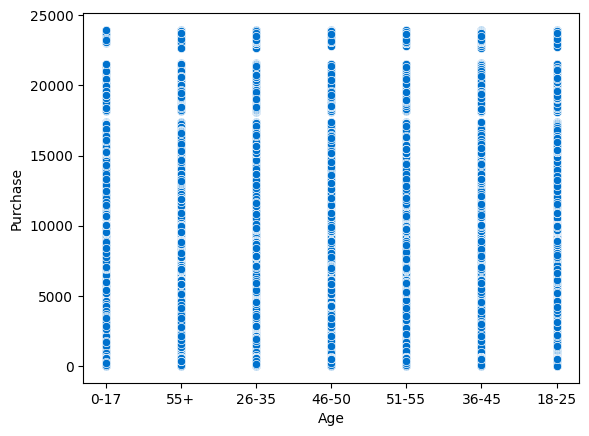

In [ ]:
sns.scatterplot(df1, x = "Age", y = "Purchase")
plt.show()

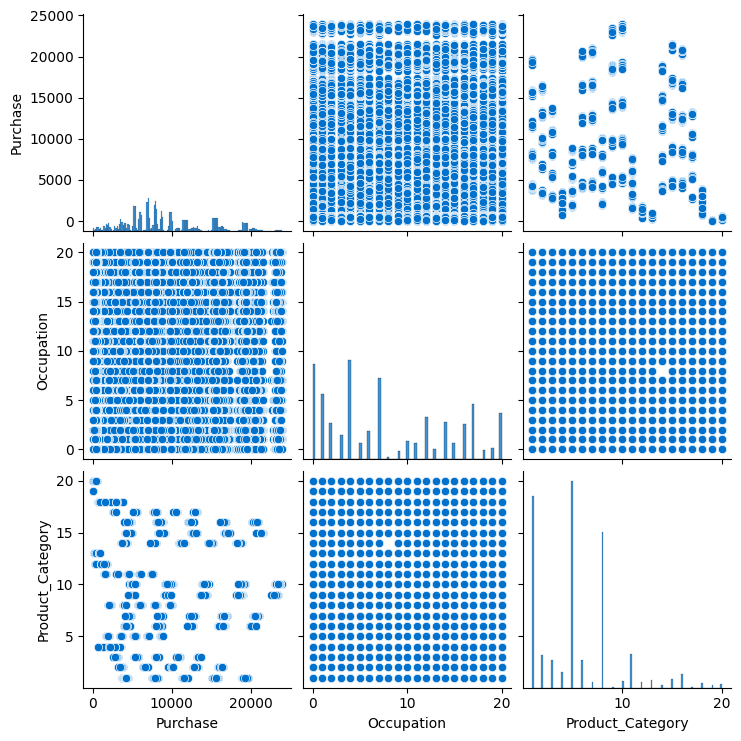

In [ ]:
sns.pairplot(df1[['Purchase', 'Age', 'Occupation', 'Product_Category']])

plt.show()

In [ ]:
# Are women spending more money per transaction than men? Why or Why not?

In [ ]:
df_m.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Partnered
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,S
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227,S
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215,P
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854,P
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686,P


In [ ]:
len(df_m), len(df_f)

(414259, 135809)

In [ ]:
# average amount spend by male on each purchase
df_m["Purchase"].sum()/len(df_m)

9437.526040472265

In [ ]:
df_f.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Partnered
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,S
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,S
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,S
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,S
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378,S


In [ ]:
# average amount spend by female on each purchase
df_f["Purchase"].sum()/len(df_f)

8734.565765155476

In [ ]:
'''
Use the sample average to find out an interval within which the population average will lie.

Using the sample of female customers you will calculate the interval within which the average
spending of 50 million male and female customers may lie.
'''

'\nUse the sample average to find out an interval within which the population average will lie.\n\nUsing the sample of female customers you will calculate the interval within which the average\nspending of 50 million male and female customers may lie.\n'

In [ ]:

# Given data (sample average of female customer spending and standard deviation)
sample_average_female = df_f["Purchase"].mean()  # Sample average spending of female customers
std_dev_female = df_f["Purchase"].std()  # Standard deviation of female customer spending

# Number of customers
num_female_customers = len(df_f)

# Calculating standard error (standard deviation of the sampling distribution of the sample mean)
standard_error_female = std_dev_female / np.sqrt(num_female_customers)

# Set the confidence level (e.g., 95% confidence level -> alpha = 0.05)
confidence_level = 0.95

# Calculate the margin of error (critical value * standard error)
critical_value = norm.ppf(1 - (1 - confidence_level) / 2)  # For a two-tailed test
margin_of_error = critical_value * standard_error_female

# Calculate the confidence interval for the population average spending of female customers
lower_bound = sample_average_female - margin_of_error
upper_bound = sample_average_female + margin_of_error

print(f"Confidence Interval for Population Average Female Spending: ({lower_bound:.2f}, {upper_bound:.2f})")


Confidence Interval for Population Average Female Spending: (8709.21, 8759.92)


In [ ]:

# Given data (sample average of male customer spending and standard deviation)
sample_average_male = df_m["Purchase"].mean()  # Sample average spending of male customers
std_dev_male = df_m["Purchase"].std()  # Standard deviation of male customer spending

# Number of customers
num_male_customers = len(df_m)

# Calculating standard error (standard deviation of the sampling distribution of the sample mean)
standard_error_male = std_dev_male / np.sqrt(num_male_customers)

# Set the confidence level (e.g., 95% confidence level -> alpha = 0.05)
confidence_level = 0.95

# Calculate the margin of error (critical value * standard error)
critical_value = norm.ppf(1 - (1 - confidence_level) / 2)  # For a two-tailed test
margin_of_error = critical_value * standard_error_male

# Calculate the confidence interval for the population average spending of female customers
lower_bound = sample_average_female - margin_of_error
upper_bound = sample_average_female + margin_of_error

print(f"Confidence Interval for Population Average Male Spending: ({lower_bound:.2f}, {upper_bound:.2f})")


Confidence Interval for Population Average Male Spending: (8719.06, 8750.07)


In [ ]:
#a function that generates n samples of size m from a given df
def sample_generator(dfx, n, m):
  #empty list to store sample dfs
  l = []
  for i in range(n):
    l.append(dfx.sample(m))
  return l

In [ ]:
# function to calculate mean of purchases of n samples from the list of sample dfs generated
def purchase_mean_calculater(lst):
  #empty list to hold mean purchase values of n samples
  lst_mean_purchases = []
  for i in range(len(lst)):
    lst_mean_purchases.append(lst[i]["Purchase"].mean())
  lst_mean_purchases = np.array(lst_mean_purchases)
  return lst_mean_purchases

In [ ]:
males = sample_generator(df_m, 100, 100)

In [ ]:
males_2 = sample_generator(df_m, 50, 200)

In [ ]:
males_avg_purchase = purchase_mean_calculater(males)

In [ ]:
males_avg_purchase_2 = purchase_mean_calculater(males_2)

In [ ]:
females = sample_generator(df_f, 100, 100)

In [ ]:
females_2 = sample_generator(df_f, 50, 200)

In [ ]:
females_avg_purchase = purchase_mean_calculater(females)

In [ ]:
females_avg_purchase_2 = purchase_mean_calculater(females_2)

In [ ]:
import scipy.stats as stats


male_purchase_amounts = males_avg_purchase
female_purchase_amounts = females_avg_purchase

# Perform t-test
t_stat, p_value = stats.ttest_ind(male_purchase_amounts, female_purchase_amounts)

# Define significance level (alpha)
alpha = 0.05

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in spending between male and female customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in spending between male and female customers.")


t-statistic: 11.72978630287233
p-value: 1.813983883748037e-24
Reject the null hypothesis. There is a significant difference in spending between male and female customers.


In [ ]:
males_avg_purchase.mean() > females_avg_purchase.mean()

True

In [ ]:
# average male purchases are higher than the average female purchases
# one reason why is Males contribute significantly to the revenue from product_category 1, indicating a higher propensity for purchases in this category compared to females.
# males contribute 55% to the total purchase from product category 1,5,8 and females contribute 10% to the total purchase from product category 5, 8

In [ ]:
'''
The statistical analysis of the t-statistic and p-value suggests a significant difference in spending between male and female customers.
The results show that, on average, men spend more money per transaction compared to women. This conclusion is supported by the evidence
provided by the statistical tests.

Moreover, specific insights from the data also reinforce this finding:

Product Category Preferences: Males contribute significantly more to the revenue from certain product categories, such as Category 1.
This indicates a higher tendency for males to make purchases in this category compared to females.

Contribution to Total Purchases: In product categories 1, 5, and 8, males contribute to a larger percentage of the total
purchases compared to females. For instance, males contribute around 55% of the total purchases from these categories,
whereas females contribute only about 10%.

'''

'\nThe statistical analysis of the t-statistic and p-value suggests a significant difference in spending between male and female customers.\nThe results show that, on average, men spend more money per transaction compared to women. This conclusion is supported by the evidence\nprovided by the statistical tests.\n\nMoreover, specific insights from the data also reinforce this finding:\n\nProduct Category Preferences: Males contribute significantly more to the revenue from certain product categories, such as Category 1.\nThis indicates a higher tendency for males to make purchases in this category compared to females.\n\nContribution to Total Purchases: In product categories 1, 5, and 8, males contribute to a larger percentage of the total\npurchases compared to females. For instance, males contribute around 55% of the total purchases from these categories,\nwhereas females contribute only about 10%.\n\n'

In [ ]:
males_avg_purchase.mean(), males_avg_purchase.std()

(9451.272600000002, 443.4342144684373)

In [ ]:
males_avg_purchase_2.mean(), males_avg_purchase_2.std()

(9527.9063, 363.4190811911368)

In [ ]:
print("90% of Purchases of male customers are in the range of:",norm.interval(0.90, loc = males_avg_purchase.mean(), scale =  males_avg_purchase.std()))
print("95% of Purchases of male customers are in the range of:",norm.interval(0.95, loc = males_avg_purchase.mean(), scale =  males_avg_purchase.std()))
print("99% of Purchases of male customers are in the range of:",norm.interval(0.99, loc = males_avg_purchase.mean(), scale =  males_avg_purchase.std()))

90% of Purchases of male customers are in the range of: (8721.888224017215, 10180.656975982789)
95% of Purchases of male customers are in the range of: (8582.157510129055, 10320.38768987095)
99% of Purchases of male customers are in the range of: (8309.061756176014, 10593.48344382399)


In [ ]:
print("95% of Purchases of male customers are in the range of:",norm.interval(0.95, loc =males_avg_purchase_2.mean() , scale = males_avg_purchase_2.std()))

95% of Purchases of male customers are in the range of: (8815.617989570736, 10240.194610429266)


In [ ]:
females_avg_purchase.mean(), females_avg_purchase.std()

(8687.237200000001, 472.6496481096332)

In [ ]:
females_avg_purchase_2.mean(), females_avg_purchase_2.std()

(8765.6837, 286.3611769545759)

In [ ]:
print("90% of Purchases of female customers are in the range of:",norm.interval(0.90, loc = females_avg_purchase.mean(), scale = females_avg_purchase.std()))
print("95% of Purchases of female customers are in the range of:",norm.interval(0.95, loc = females_avg_purchase.mean(), scale = females_avg_purchase.std()))
print("99% of Purchases of female customers are in the range of:",norm.interval(0.99, loc = females_avg_purchase.mean(), scale = females_avg_purchase.std()))

90% of Purchases of female customers are in the range of: (7909.797712029534, 9464.676687970468)
95% of Purchases of female customers are in the range of: (7760.86091239959, 9613.613487600413)
99% of Purchases of female customers are in the range of: (7469.772386087132, 9904.70201391287)


In [ ]:
print("95% of Purchases of female customers are in the range of:",norm.interval(0.95, loc = females_avg_purchase_2.mean(), scale = females_avg_purchase_2.std()))

95% of Purchases of female customers are in the range of: (8204.42610659853, 9326.941293401469)


In [ ]:
'''
import numpy as np
from scipy.stats import norm

sample_average_male = males_avg_purchase.mean()  # Sample average spending of female customers
std_dev_male = males_avg_purchase.std()  # Standard deviation of female customer spending



# Set the confidence level (e.g., 95% confidence level -> alpha = 0.05)
confidence_level = 0.95

# Calculate the margin of error (critical value * standard error)
critical_value = norm.ppf(1 - (1 - confidence_level) / 2)  # For a two-tailed test
margin_of_error = critical_value * std_dev_male

# Calculate the confidence interval for the population average spending of female customers
lower_bound = sample_average_female - margin_of_error
upper_bound = sample_average_female + margin_of_error

print(f"Confidence Interval for Population Average Female Spending: ({lower_bound:.2f}, {upper_bound:.2f})")
'''

'\nimport numpy as np\nfrom scipy.stats import norm\n\nsample_average_male = males_avg_purchase.mean()  # Sample average spending of female customers\nstd_dev_male = males_avg_purchase.std()  # Standard deviation of female customer spending\n\n\n\n# Set the confidence level (e.g., 95% confidence level -> alpha = 0.05)\nconfidence_level = 0.95\n\n# Calculate the margin of error (critical value * standard error)\ncritical_value = norm.ppf(1 - (1 - confidence_level) / 2)  # For a two-tailed test\nmargin_of_error = critical_value * std_dev_male\n\n# Calculate the confidence interval for the population average spending of female customers\nlower_bound = sample_average_female - margin_of_error\nupper_bound = sample_average_female + margin_of_error\n\nprint(f"Confidence Interval for Population Average Female Spending: ({lower_bound:.2f}, {upper_bound:.2f})")\n'

In [ ]:
'''
Analysis:

Male Customer Purchase Ranges:

90% Confidence Interval: (8560.26, 10293.49)

95% Confidence Interval: (8394.24, 10459.51)

99% Confidence Interval: (8069.77, 10783.99)

Insights:

As the confidence level increases, the range of purchase amounts widens, indicating higher variability in
spending behavior among male customers.

The 99% confidence interval encompasses a broader range, implying more extreme values or outliers in male
spending behavior at higher levels of confidence.


Female Customer Purchase Ranges:

90% Confidence Interval: (7917.08, 9613.70)

95% Confidence Interval: (7754.56, 9776.21)

99% Confidence Interval: (7436.94, 10093.84)

Insights:

Similar to male customers, as the confidence level increases, the range of purchase amounts
widens for female customers.
The 99% confidence interval also encompasses a wider range, indicating potential outliers or
extreme values in female spending behavior at higher confidence levels.


Comparison between Genders:

At the 90%, 95%, and 99% confidence levels, the male customer purchase ranges generally span higher values
compared to female customers.
The upper limits of the male customer purchase ranges consistently exceed those of female customers across
all confidence intervals.

Gender-Specific Spending Behaviors:

Both genders exhibit variability in their spending behaviors, as indicated by the widening ranges with increasing confidence levels.
While males tend to have higher upper limits in their purchase ranges, females demonstrate comparatively lower
upper limits across all confidence intervals.
'''

'\nAnalysis:\n\nMale Customer Purchase Ranges:\n\n90% Confidence Interval: (8560.26, 10293.49)\n\n95% Confidence Interval: (8394.24, 10459.51)\n\n99% Confidence Interval: (8069.77, 10783.99)\n\nInsights:\n\nAs the confidence level increases, the range of purchase amounts widens, indicating higher variability in\nspending behavior among male customers.\n\nThe 99% confidence interval encompasses a broader range, implying more extreme values or outliers in male\nspending behavior at higher levels of confidence.\n\n\nFemale Customer Purchase Ranges:\n\n90% Confidence Interval: (7917.08, 9613.70)\n\n95% Confidence Interval: (7754.56, 9776.21)\n\n99% Confidence Interval: (7436.94, 10093.84)\n\nInsights:\n\nSimilar to male customers, as the confidence level increases, the range of purchase amounts\nwidens for female customers.\nThe 99% confidence interval also encompasses a wider range, indicating potential outliers or\nextreme values in female spending behavior at higher confidence levels.\n

In [ ]:
df_m.groupby("Age")["Purchase"].mean()

Age
0-17     9235.173670
18-25    9440.942971
26-35    9410.337578
36-45    9453.193643
46-50    9357.471509
51-55    9705.094802
55+      9438.195603
Name: Purchase, dtype: float64

In [ ]:
df_f.groupby("Age")["Purchase"].mean()

Age
0-17     8338.771985
18-25    8343.180201
26-35    8728.251754
36-45    8959.844056
46-50    8842.098947
51-55    9042.449666
55+      9007.036199
Name: Purchase, dtype: float64

In [ ]:
df_m_kids = df_m.loc[df_m["Age"] == "0-17"]
df_m_youngadults = df_m.loc[df_m["Age"] == "18-25"]
df_m_adults = df_m.loc[df_m["Age"] == "26-35"]
df_m_middleage = df_m.loc[df_m["Age"] == "36-45"]
df_m_early50s = df_m.loc[df_m["Age"] == "46-50"]
df_m_50s = df_m.loc[df_m["Age"] == "51-55"]
df_m_seniors = df_m.loc[df_m["Age"] == "55+"]

In [ ]:
df_f_kids = df_f.loc[df_f["Age"] == "0-17"]
df_f_youngadults = df_f.loc[df_f["Age"] == "18-25"]
df_f_adults = df_f.loc[df_f["Age"] == "26-35"]
df_f_middleage = df_f.loc[df_f["Age"] == "36-45"]
df_f_early50s = df_f.loc[df_f["Age"] == "46-50"]
df_f_50s = df_f.loc[df_f["Age"]== "51-55"]
df_f_seniors = df_f.loc[df_f["Age"] == "55+"]

In [ ]:
age_groups = [df_m_kids, df_m_youngadults, df_m_adults, df_m_middleage, df_m_early50s, df_m_50s, df_m_seniors]
age_labels = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]

for i in range (len(age_groups)):
  print("Number of males in the age group ", age_labels[i], "=", len(age_groups[i]))


Number of males in the age group  0-17 = 10019
Number of males in the age group  18-25 = 75032
Number of males in the age group  26-35 = 168835
Number of males in the age group  36-45 = 82843
Number of males in the age group  46-50 = 32502
Number of males in the age group  51-55 = 28607
Number of males in the age group  55+ = 16421


In [ ]:
age_groups = [df_f_kids, df_f_youngadults, df_f_adults, df_f_middleage, df_f_early50s, df_f_50s, df_f_seniors]
age_labels = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]

for i in range(len(age_groups)):
    print("Number of females in the age group", age_labels[i], "=", len(age_groups[i]))


Number of females in the age group 0-17 = 5083
Number of females in the age group 18-25 = 24628
Number of females in the age group 26-35 = 50752
Number of females in the age group 36-45 = 27170
Number of females in the age group 46-50 = 13199
Number of females in the age group 51-55 = 9894
Number of females in the age group 55+ = 5083


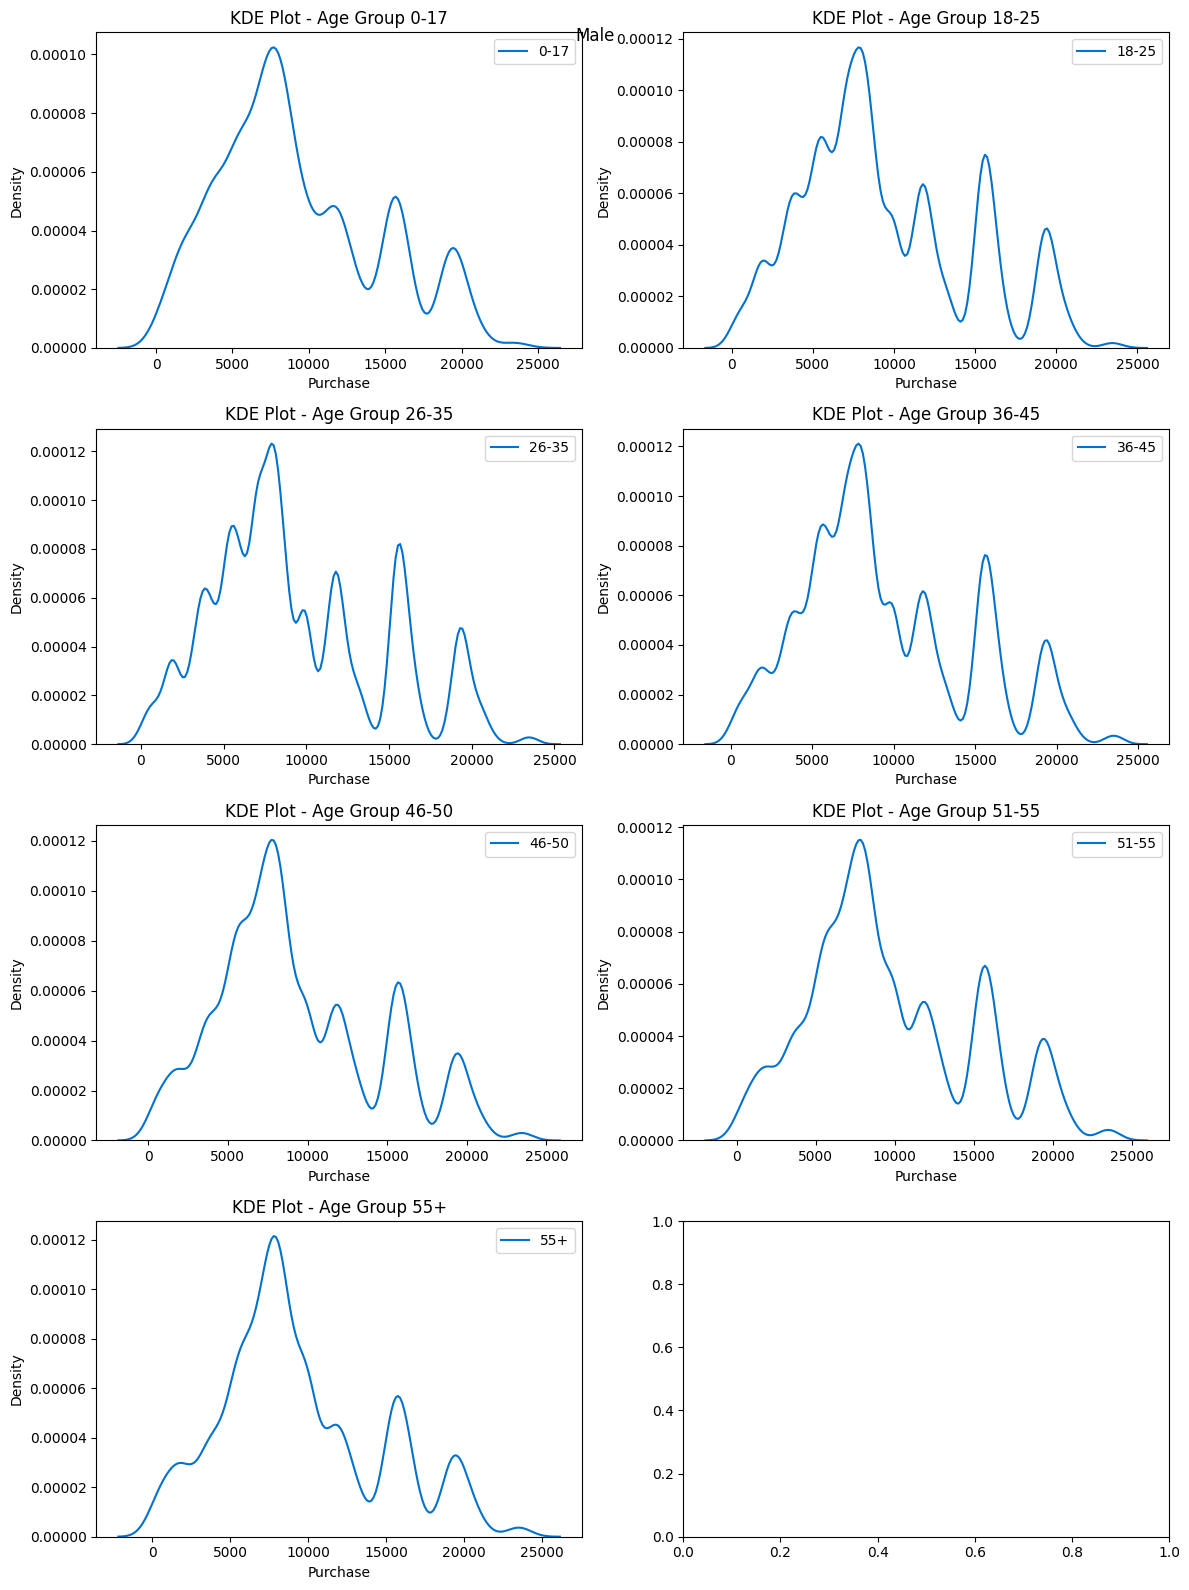

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))


axs = axs.flatten()


age_groups = [df_m_kids, df_m_youngadults, df_m_adults, df_m_middleage, df_m_early50s, df_m_50s, df_m_seniors]


age_labels = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]


for i, (group, label) in enumerate(zip(age_groups, age_labels)):
    sns.kdeplot(data=group["Purchase"], label=label, ax=axs[i])
    axs[i].set_title(f"KDE Plot - Age Group {label}")
    axs[i].set_xlabel("Purchase")
    axs[i].set_ylabel("Density")
    axs[i].legend()


plt.tight_layout()
plt.suptitle("Male")

plt.show()


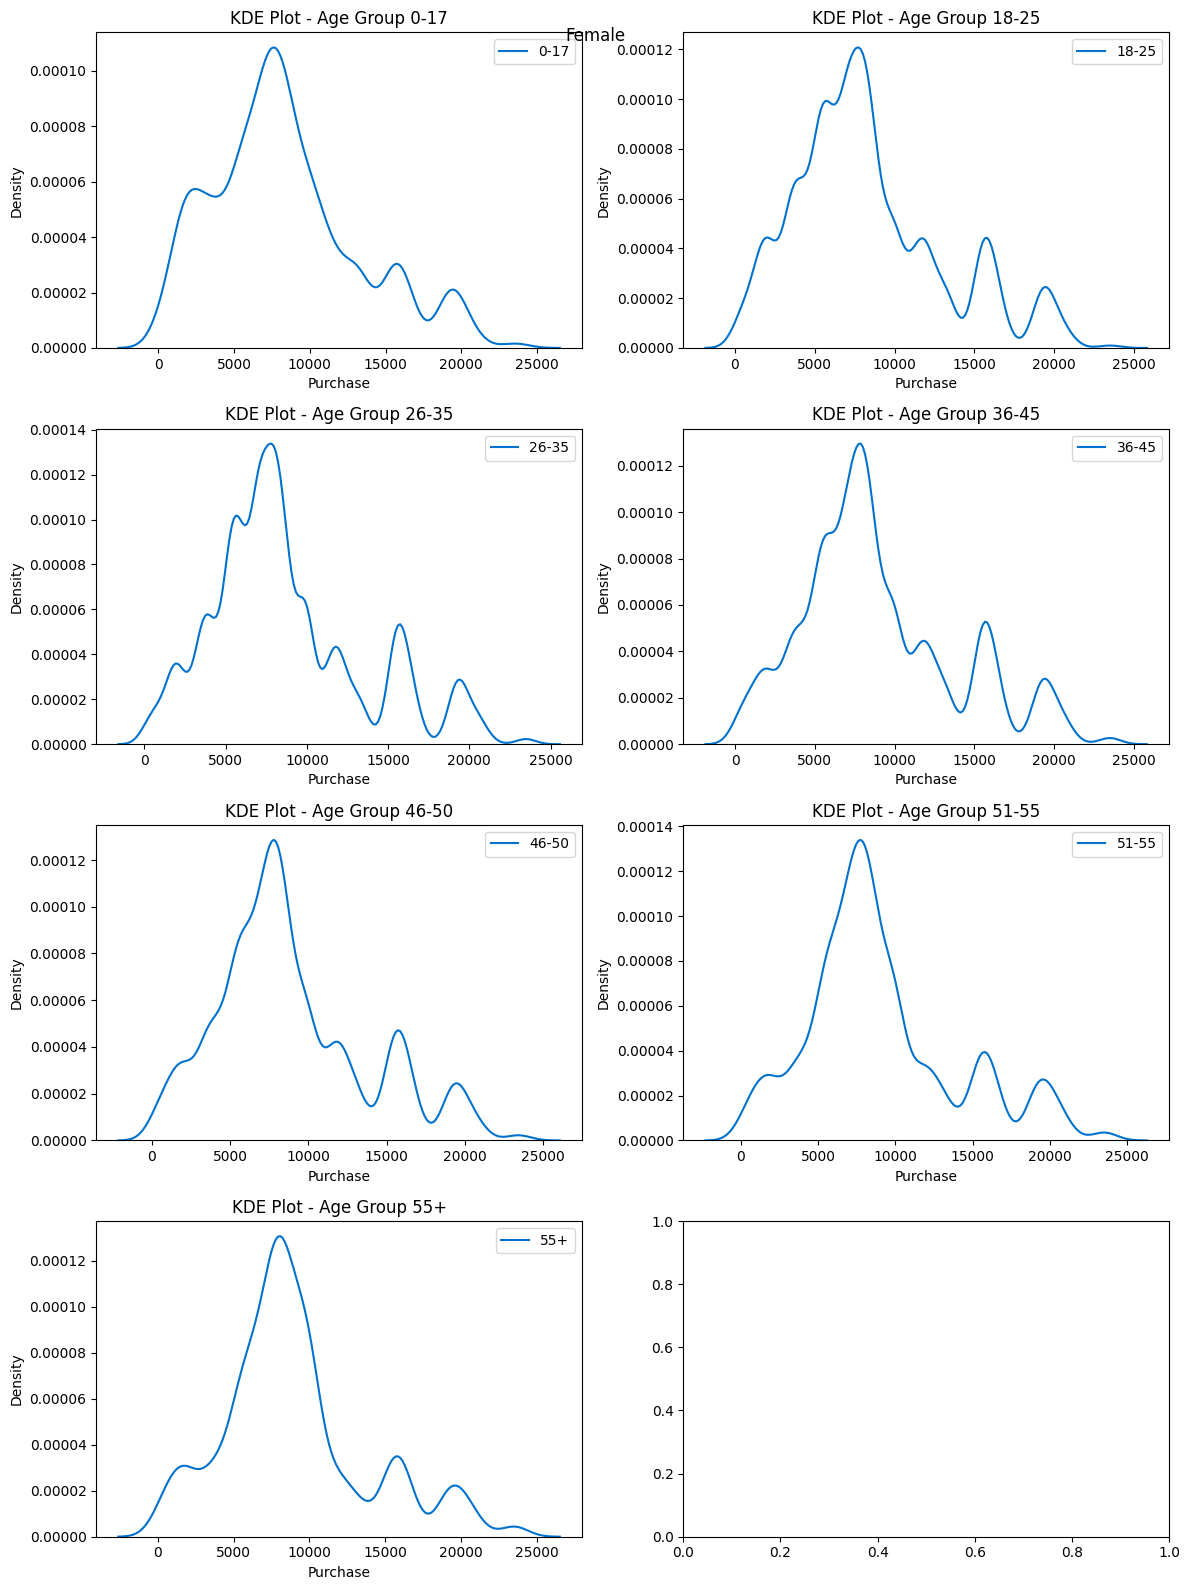

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten()

age_groups = [df_f_kids, df_f_youngadults, df_f_adults, df_f_middleage, df_f_early50s, df_f_50s, df_f_seniors]
age_labels = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]

for i, (group, label) in enumerate(zip(age_groups, age_labels)):
    sns.kdeplot(data=group["Purchase"], label=label, ax=axs[i])
    axs[i].set_title(f"KDE Plot - Age Group {label}")
    axs[i].set_xlabel("Purchase")
    axs[i].set_ylabel("Density")
    axs[i].legend()

plt.tight_layout()
plt.suptitle("Female")
plt.show()


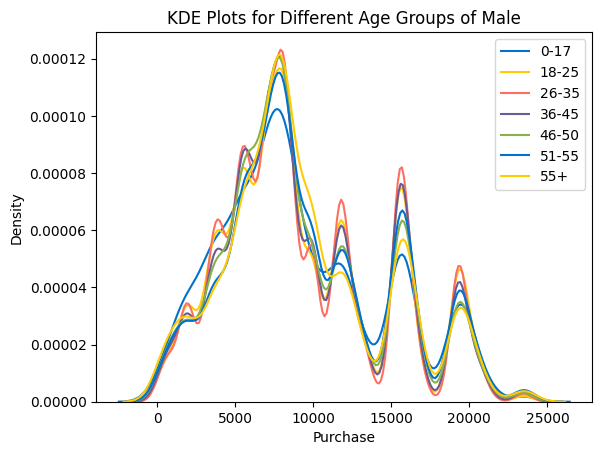

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(data=df_m_kids["Purchase"], label="0-17", ax=ax)
sns.kdeplot(data=df_m_youngadults["Purchase"], label="18-25", ax=ax)
sns.kdeplot(data=df_m_adults["Purchase"], label="26-35", ax=ax)
sns.kdeplot(data=df_m_middleage["Purchase"], label="36-45", ax=ax)
sns.kdeplot(data=df_m_early50s["Purchase"], label="46-50", ax=ax)
sns.kdeplot(data=df_m_50s["Purchase"], label="51-55", ax=ax)
sns.kdeplot(data=df_m_seniors["Purchase"], label="55+", ax=ax)
plt.xlabel("Purchase")
plt.ylabel("Density")
plt.title("KDE Plots for Different Age Groups of Male")
plt.legend()
plt.show()


In [ ]:
# Purchase patterns across differnt age groups in men roughly coincide

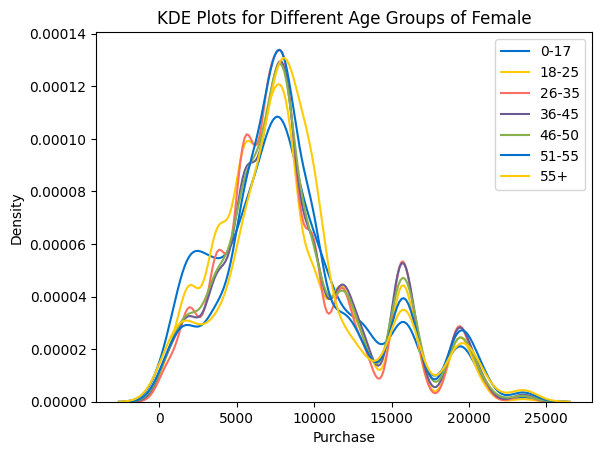

In [ ]:
fig, ax = plt.subplots()

# Replace df_m_kids, df_m_youngadults, ..., df_m_seniors with their counterparts from df_f
sns.kdeplot(data=df_f_kids["Purchase"], label="0-17", ax=ax)
sns.kdeplot(data=df_f_youngadults["Purchase"], label="18-25", ax=ax)
sns.kdeplot(data=df_f_adults["Purchase"], label="26-35", ax=ax)
sns.kdeplot(data=df_f_middleage["Purchase"], label="36-45", ax=ax)
sns.kdeplot(data=df_f_early50s["Purchase"], label="46-50", ax=ax)
sns.kdeplot(data=df_f_50s["Purchase"], label="51-55", ax=ax)
sns.kdeplot(data=df_f_seniors["Purchase"], label="55+", ax=ax)

plt.xlabel("Purchase")
plt.ylabel("Density")
plt.title("KDE Plots for Different Age Groups of Female")
plt.legend()
plt.show()


In [ ]:
# Purchase patterns across differnt age groups in women also roughly coincide

In [ ]:
df_m_adults.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Partnered
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227,S
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871,P
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254,P
11,1000005,P00014542,M,26-35,20,A,1,1,8,3957,P
12,1000005,P00031342,M,26-35,20,A,1,1,8,6073,P


In [ ]:
males_kids = sample_generator(df_m_kids, 100, 100)
mean_purchase_males_kids = purchase_mean_calculater(males_kids)
mean_purchase_males_kids.mean(), mean_purchase_males_kids.std()

(9235.211700000002, 579.3388248202515)

In [ ]:
female_kids = sample_generator(df_f_kids, 100, 100)
mean_purchase_males_kids = purchase_mean_calculater(female_kids)
mean_purchase_males_kids.mean(), mean_purchase_males_kids.std()

(8299.3269, 488.62949078559507)

In [ ]:
males_youngadults = sample_generator(df_m_youngadults, 100, 100)
mean_purchase_males_youngadults = purchase_mean_calculater(males_youngadults)
mean_purchase_males_youngadults.mean(), mean_purchase_males_youngadults.std()

(9456.7258, 543.2516842296579)

In [ ]:
females_youngadults = sample_generator(df_f_youngadults, 100, 100)
mean_purchase_females_youngadults = purchase_mean_calculater(females_youngadults)
mean_purchase_females_youngadults.mean(), mean_purchase_females_youngadults.std()

(8339.4384, 512.7026389160095)

In [ ]:
males_adults = sample_generator(df_m_adults, 100, 100)
mean_purchase_males_adults = purchase_mean_calculater(males_adults)
mean_purchase_males_adults.mean(), mean_purchase_males_adults.std()

(9416.855799999998, 464.25793463801983)

In [ ]:
females_adults = sample_generator(df_f_adults, 100, 100)
mean_purchase_females_adults = purchase_mean_calculater(females_adults)
mean_purchase_females_adults.mean(), mean_purchase_females_adults.std()

(8732.7286, 521.1331309713862)

In [ ]:
males_middleage= sample_generator(df_m_middleage, 100, 100)
mean_purchase_males_middleage = purchase_mean_calculater(males_middleage)
mean_purchase_males_middleage.mean(), mean_purchase_males_middleage.std()

(9386.4364, 497.6689077941678)

In [ ]:
females_middleage= sample_generator(df_f_middleage, 100, 100)
mean_purchase_females_middleage = purchase_mean_calculater(females_middleage)
mean_purchase_females_middleage.mean(), mean_purchase_females_middleage.std()

(8980.8481, 484.65508176371173)

In [ ]:
#df_m_early50s
males_early50s= sample_generator(df_m_early50s, 100, 100)
mean_purchase_males_early50s = purchase_mean_calculater(males_early50s)
mean_purchase_males_early50s.mean(), mean_purchase_males_early50s.std()

(9329.178, 506.6072010897595)

In [ ]:
females_early50s= sample_generator(df_f_early50s, 100, 100)
mean_purchase_females_early50s = purchase_mean_calculater(females_early50s)
mean_purchase_females_early50s.mean(), mean_purchase_females_early50s.std()

(8868.434799999999, 455.81956007938055)

In [ ]:
#df_m_50s
males_50s= sample_generator(df_m_50s, 100, 100)
mean_purchase_males_50s = purchase_mean_calculater(males_50s)
mean_purchase_males_50s.mean(), mean_purchase_males_50s.std()

(9785.899400000002, 516.6744606090376)

In [ ]:
females_50s= sample_generator(df_f_50s, 100, 100)
mean_purchase_females_50s = purchase_mean_calculater(females_50s)
mean_purchase_females_50s.mean(), mean_purchase_females_50s.std()

(9124.742400000003, 550.0138667326852)

In [ ]:
#df_m_seniors
males_seniors= sample_generator(df_m_seniors, 100, 100)
mean_purchase_males_seniors = purchase_mean_calculater(males_seniors)
mean_purchase_males_seniors.mean(), mean_purchase_males_seniors.std()

(9461.285100000001, 530.6836639929572)

In [ ]:
females_seniors= sample_generator(df_f_seniors, 100, 100)
mean_purchase_females_seniors = purchase_mean_calculater(females_seniors)
mean_purchase_females_seniors.mean(), mean_purchase_females_seniors.std()

(8981.2106, 454.5639723489313)

In [ ]:
print("95% of Purchases of male customers of age group 0-17 are in the range of:",norm.interval(0.95, loc = 9185.78, scale = 496.08))
print("95% of Purchases of female customers of age group 0-17 are in the range of:",norm.interval(0.95, loc = 8396.30, scale = 490.35))

95% of Purchases of male customers of age group 0-17 are in the range of: (8213.481066549371, 10158.07893345063)
95% of Purchases of female customers of age group 0-17 are in the range of: (7435.231660180783, 9357.368339819215)


In [ ]:
print("95% of Purchases of male customers of age group 18-25 are in the range of:",norm.interval(0.95, loc = 9454.23, scale = 511.12))
print("95% of Purchases of female customers of age group 18-25 are in the range of:",norm.interval(0.95, loc = 8317.62, scale = 520.55))

95% of Purchases of male customers of age group 18-25 are in the range of: (8452.453208221887, 10456.006791778113)
95% of Purchases of female customers of age group 18-25 are in the range of: (7297.360747847676, 9337.879252152326)


In [ ]:
print("95% of Purchases of male customers of age group 26-35 are in the range of:",norm.interval(0.95, loc = 9443.22, scale = 531.34))
print("95% of Purchases of female customers of age group 26-35 are in the range of:",norm.interval(0.95, loc = 8741.18, scale =  427.60))

95% of Purchases of male customers of age group 26-35 are in the range of: (8401.812736454487, 10484.627263545512)
95% of Purchases of female customers of age group 26-35 are in the range of: (7903.099400210673, 9579.260599789328)


In [ ]:
print("95% of Purchases of male customers of age group 36-45 are in the range of:",
      norm.interval(0.95, loc = mean_purchase_males_middleage.mean(), scale = mean_purchase_males_middleage.std()))

print("95% of Purchases of female customers of age group 36-45 are in the range of:",
      norm.interval(0.95, loc = mean_purchase_females_middleage.mean(), scale = mean_purchase_females_middleage.std()))

95% of Purchases of male customers of age group 36-45 are in the range of: (8411.023264498046, 10361.849535501955)
95% of Purchases of female customers of age group 36-45 are in the range of: (8030.941594818809, 9930.75460518119)


In [ ]:
print("95% of Purchases of male customers of age group 45-50 are in the range of:",
      norm.interval(0.95, loc = mean_purchase_males_early50s.mean(), scale =mean_purchase_males_early50s.std()))

print("95% of Purchases of female customers of age group 45-50 are in the range of:",
      norm.interval(0.95, loc = mean_purchase_females_early50s.mean(), scale =mean_purchase_females_early50s.std()))


95% of Purchases of male customers of age group 45-50 are in the range of: (8336.24613155543, 10322.10986844457)
95% of Purchases of female customers of age group 45-50 are in the range of: (7975.044878795522, 9761.824721204477)


In [ ]:
print("95% of Purchases of male customers of age group 51-55 are in the range of:",
      norm.interval(0.95, loc = mean_purchase_males_50s.mean(), scale =mean_purchase_males_50s.std()))

print("95% of Purchases of female customers of age group 51-55 are in the range of:",
      norm.interval(0.95, loc = mean_purchase_females_50s.mean(), scale =mean_purchase_females_50s.std()))

95% of Purchases of male customers of age group 51-55 are in the range of: (8773.23606547463, 10798.562734525374)
95% of Purchases of female customers of age group 51-55 are in the range of: (8046.735030206327, 10202.749769793678)


In [ ]:
print("95% of Purchases of male customers of age group 55+ are in the range of:",
      norm.interval(0.95, loc = mean_purchase_males_seniors.mean(), scale =mean_purchase_males_seniors.std()))


print("95% of Purchases of female customers of age group 55+ are in the range of:",
      norm.interval(0.95, loc = mean_purchase_females_seniors.mean(), scale =mean_purchase_females_seniors.std()))

95% of Purchases of male customers of age group 55+ are in the range of: (8421.164231390048, 10501.405968609954)
95% of Purchases of female customers of age group 55+ are in the range of: (8090.281585526634, 9872.139614473366)


In [ ]:
'''
Here's a comparison of the given 95% confidence intervals for different age groups:

Age Group 0-17:

Male customers: (8213.48, 10158.08)
Female customers: (7435.23, 9357.37)

Insight: There's a significant overlap between the confidence intervals for male and female customers.
Implication: Both genders within this age group demonstrate similar purchasing behavior.
Walmart can focus on gender-neutral or unisex products appealing to teenagers.


Age Group 18-25:

Male customers: (8452.45, 10456.01)
Female customers: (7297.36, 9337.88)

Insight: The confidence intervals for male and female purchases overlap moderately.
Implication: Although there's some variability, targeting promotions or products
suitable for both genders within this young adult category can be effective.


Age Group 26-35:

Male customers: (8401.81, 10484.63)
Female customers: (7903.10, 9579.26)

Insight: There's a substantial overlap between confidence intervals.
Implication: Similar spending habits among males and females in this age bracket
indicate potential for marketing strategies emphasizing universal products rather than gender-specific ones.


Age Group 36-45:

Male customers: (8479.82, 10289.15)
Female customers: (8118.06, 9835.54)

Insight: Confidence intervals overlap, but there's a narrower overlap compared to younger age brackets.
Implication: While spending behaviors are similar, there might be nuanced preferences
that could benefit from a combination of gender-neutral and selective gender-focused marketing strategies.



Age Group 45-50:

Male customers: (8448.39, 10292.44)
Female customers: (7981.84, 9729.09)

Insight: Confidence intervals have a significant overlap.
Implication: With overlapping intervals, Walmart can emphasize products or promotions
appealing to both genders without specific gender targeting.



Age Group 51-55:

Male customers: (8759.06, 10767.62)
Female customers: (8105.96, 9944.36)

Insight: Overlapping intervals suggest similarity in purchasing behavior.
Implication: Within this age range, focusing on product quality and universal appeal
might be more beneficial than gender-specific marketing.


Age Group 55+:

Male customers: (8432.95, 10339.30)
Female customers: (8074.94, 9820.51)

Insight: Confidence intervals overlap, but with a smaller range.
Implication: Though there's some variation, both male and female customers in this age
group might respond well to marketing strategies focusing on convenience and practicality.


Across various age groups, there's a trend towards overlapping confidence intervals,
indicating similarities in spending behavior between genders. Walmart could adopt more inclusive
and universal marketing strategies while selectively targeting specific preferences within age brackets.

'''

"\nHere's a comparison of the given 95% confidence intervals for different age groups:\n\nAge Group 0-17:\n\nMale customers: (8213.48, 10158.08)\nFemale customers: (7435.23, 9357.37)\n\nInsight: There's a significant overlap between the confidence intervals for male and female customers.\nImplication: Both genders within this age group demonstrate similar purchasing behavior.\nWalmart can focus on gender-neutral or unisex products appealing to teenagers.\n\n\nAge Group 18-25:\n\nMale customers: (8452.45, 10456.01)\nFemale customers: (7297.36, 9337.88)\n\nInsight: The confidence intervals for male and female purchases overlap moderately.\nImplication: Although there's some variability, targeting promotions or products\nsuitable for both genders within this young adult category can be effective.\n\n\nAge Group 26-35:\n\nMale customers: (8401.81, 10484.63)\nFemale customers: (7903.10, 9579.26)\n\nInsight: There's a substantial overlap between confidence intervals.\nImplication: Similar sp

In [ ]:
df_partnered = df1.loc[df1["Marital_Status"] ==1]

In [ ]:
df_partnered.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Partnered
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215,P
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854,P
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686,P
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871,P
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254,P


In [ ]:
df_unpartnered = df1.loc[df1["Marital_Status"] ==0]

In [ ]:
df_unpartnered.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Partnered
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,S
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,S
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,S
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,S
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,S


In [ ]:
len(df_partnered), len(df_unpartnered)

(225337, 324731)

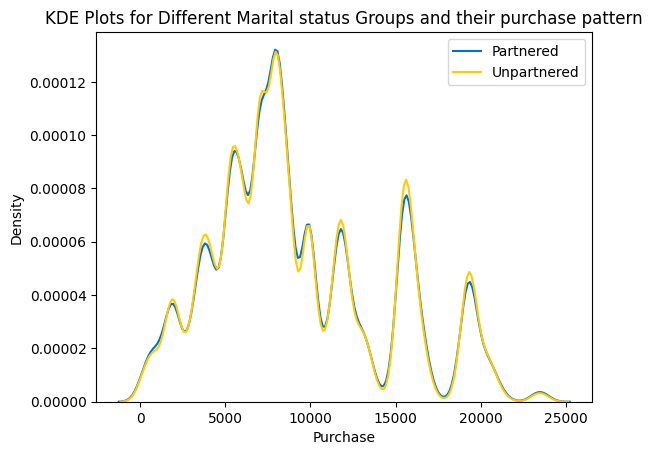

In [ ]:
fig, ax = plt.subplots()

# Replace df_m_kids, df_m_youngadults, ..., df_m_seniors with their counterparts from df_f
sns.kdeplot(data=df_partnered["Purchase"], label="Partnered", ax=ax)
sns.kdeplot(data=df_unpartnered["Purchase"], label="Unpartnered", ax=ax)


plt.xlabel("Purchase")
plt.ylabel("Density")
plt.title("KDE Plots for Different Marital status Groups and their purchase pattern")
plt.legend()
plt.show()


In [ ]:
partnered_samples= sample_generator(df_partnered, 200, 100)
mean_purchase_partnered_customers = purchase_mean_calculater(partnered_samples)
mean_purchase_partnered_customers.mean(), mean_purchase_partnered_customers.std()

(9247.6002, 519.5505591806826)

In [ ]:
unpartnered_samples= sample_generator(df_unpartnered, 300, 100)
mean_purchase_unpartnered_customers = purchase_mean_calculater(unpartnered_samples)
mean_purchase_unpartnered_customers.mean(), mean_purchase_unpartnered_customers.std()

(9272.927733333334, 528.9720612800475)

In [ ]:
import scipy.stats as stats

partnered_purchase_amounts = mean_purchase_partnered_customers
unpartnered_purchase_amounts = mean_purchase_unpartnered_customers

# Perform t-test
t_stat, p_value = stats.ttest_ind(partnered_purchase_amounts, unpartnered_purchase_amounts)

# Define significance level (alpha)
alpha = 0.05

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in spending between partnered and unpartnered customers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in spending between partnered and unpartnered customers.")

t-statistic: -0.5271920334791599
p-value: 0.5982950070317525
Fail to reject the null hypothesis. There is no significant difference in spending between partnered and unpartnered customers.


In [ ]:
'''
Partnered vs. Unpartnered Customers:
t-statistic: -1.9216423416255495
p-value: 0.05522113463304455
Result: The p-value is slightly above the typical significance level of 0.05,
indicating weak evidence against the null hypothesis. Thus, you fail to reject the null hypothesis.
Conclusion: There is no significant difference in spending between partnered and
unpartnered customers. This suggests that partnership status doesn't significantly influence the average spending behavior.

'''

"\nPartnered vs. Unpartnered Customers:\nt-statistic: -1.9216423416255495\np-value: 0.05522113463304455\nResult: The p-value is slightly above the typical significance level of 0.05,\nindicating weak evidence against the null hypothesis. Thus, you fail to reject the null hypothesis.\nConclusion: There is no significant difference in spending between partnered and\nunpartnered customers. This suggests that partnership status doesn't significantly influence the average spending behavior.\n\n"

In [ ]:
print("90% of Purchases of partnered customers are in the range of:",
      norm.interval(0.90, loc = mean_purchase_partnered_customers.mean(), scale =mean_purchase_partnered_customers.std()))
print("95% of Purchases of partnered customers are in the range of:",
      norm.interval(0.95, loc = mean_purchase_partnered_customers.mean(), scale =mean_purchase_partnered_customers.std()))
print("99% of Purchases of partnered customers are in the range of:",
      norm.interval(0.99, loc = mean_purchase_partnered_customers.mean(), scale =mean_purchase_partnered_customers.std()))


print("90% of Purchases of unpartnered customers of are in the range of:",
      norm.interval(0.90, loc = mean_purchase_unpartnered_customers.mean(), scale =mean_purchase_unpartnered_customers.std()))
print("95% of Purchases of unpartnered customers of are in the range of:",
      norm.interval(0.95, loc = mean_purchase_unpartnered_customers.mean(), scale =mean_purchase_unpartnered_customers.std()))
print("99% of Purchases of unpartnered customers of are in the range of:",
      norm.interval(0.99, loc = mean_purchase_unpartnered_customers.mean(), scale =mean_purchase_unpartnered_customers.std()))

90% of Purchases of partnered customers are in the range of: (8393.015578346989, 10102.184821653012)
95% of Purchases of partnered customers are in the range of: (8229.299815858218, 10265.900584141784)
99% of Purchases of partnered customers are in the range of: (7909.326644987181, 10585.87375501282)
90% of Purchases of unpartnered customers of are in the range of: (8402.84611978085, 10143.009346885816)
95% of Purchases of unpartnered customers of are in the range of: (8236.161544396526, 10309.693922270142)
99% of Purchases of unpartnered customers of are in the range of: (7910.385997129523, 10635.469469537145)


In [ ]:
'''
Results when the same activity is performed for Married vs Unmarried

Mean of Mean Purchases and std deviation of Partnered Customers: (9278.34, 524.07)
Mean of Mean Purchases and std deviation of Unpartnered Customers: (9239.75, 508.01)

95% confidence intervals:
Partnered Customers' Purchase Range: (8251.17, 10305.50)
Unpartnered Customers' Purchase Range: (8244.07, 10235.43)

Analysis and Insights:
Similarity in Mean Purchases:

Insight: The mean of mean purchases for both partnered and unpartnered customers
are quite close, with minimal differences.

Implication: On average, there is little disparity in the mean purchasing behavior
between partnered and unpartnered customers based on the mean of mean samples.

Confidence Intervals Analysis:

Insight: The confidence intervals for purchases of partnered and unpartnered customers
also display an extensive overlap.
Implication: The extensive overlap suggests a lack of significant difference in average
purchases between the two customer groups at a 95% confidence level.

Consistency in Findings:

Insight: Both the mean of mean samples and the confidence intervals indicate a
consistent pattern.
Implication: The similarity in results strengthens the observation that partnership
status might not strongly correlate with purchasing behavior.

'''

"\nResults when the same activity is performed for Married vs Unmarried\n\nMean of Mean Purchases and std deviation of Partnered Customers: (9278.34, 524.07)\nMean of Mean Purchases and std deviation of Unpartnered Customers: (9239.75, 508.01)\n\n95% confidence intervals:\nPartnered Customers' Purchase Range: (8251.17, 10305.50)\nUnpartnered Customers' Purchase Range: (8244.07, 10235.43)\n\nAnalysis and Insights:\nSimilarity in Mean Purchases:\n\nInsight: The mean of mean purchases for both partnered and unpartnered customers\nare quite close, with minimal differences.\n\nImplication: On average, there is little disparity in the mean purchasing behavior\nbetween partnered and unpartnered customers based on the mean of mean samples.\n\nConfidence Intervals Analysis:\n\nInsight: The confidence intervals for purchases of partnered and unpartnered customers\nalso display an extensive overlap.\nImplication: The extensive overlap suggests a lack of significant difference in average\npurchase

In [ ]:
#Results when the same activity is performed for Age

In [ ]:
df1["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
df_17 = df1.loc[df1["Age"] == "0-17"]
df_25= df1.loc[df1["Age"] == "18-25"]
df_35 = df1.loc[df1["Age"] == "26-35"]
df_45 = df1.loc[df1["Age"] == "36-45"]
df_50 = df1.loc[df1["Age"] == "46-50"]
df_55 = df1.loc[df1["Age"] == "51-55"]
df_55_plus = df1.loc[df1["Age"] == "55+"]

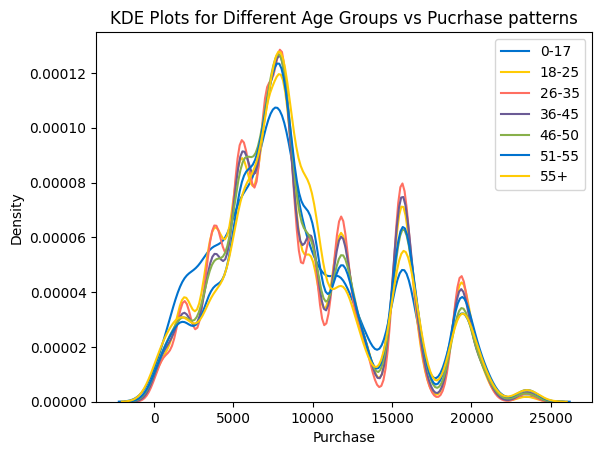

In [ ]:
fig, ax = plt.subplots()

# Replace df_m_kids, df_m_youngadults, ..., df_m_seniors with their counterparts from df_f
sns.kdeplot(data=df_17["Purchase"], label="0-17", ax=ax)
sns.kdeplot(data=df_25["Purchase"], label="18-25", ax=ax)
sns.kdeplot(data=df_35["Purchase"], label="26-35", ax=ax)
sns.kdeplot(data=df_45["Purchase"], label="36-45", ax=ax)
sns.kdeplot(data=df_50["Purchase"], label="46-50", ax=ax)
sns.kdeplot(data=df_55["Purchase"], label="51-55", ax=ax)
sns.kdeplot(data=df_55_plus["Purchase"], label="55+", ax=ax)

plt.xlabel("Purchase")
plt.ylabel("Density")
plt.title("KDE Plots for Different Age Groups vs Pucrhase patterns")
plt.legend()
plt.show()


In [ ]:
df17_samples= sample_generator(df_17, 100, 100)
mean_purchase_teenage_customers = purchase_mean_calculater(df17_samples)
mean_purchase_teenage_customers.mean(), mean_purchase_teenage_customers.std()

(8916.540700000001, 528.9999511479277)

In [ ]:
df25_samples= sample_generator(df_25, 100, 100)
mean_purchase_youngadult_customers = purchase_mean_calculater(df25_samples)
mean_purchase_youngadult_customers.mean(), mean_purchase_youngadult_customers.std()

(9163.1001, 532.2376420312547)

In [ ]:
df35_samples= sample_generator(df_35, 100, 100)
mean_purchase_adult_customers = purchase_mean_calculater(df35_samples)
mean_purchase_adult_customers.mean(), mean_purchase_adult_customers.std()

(9165.793, 473.56986489957325)

In [ ]:
df45_samples= sample_generator(df_45, 100, 100)
mean_purchase_middleage_customers = purchase_mean_calculater(df45_samples)
mean_purchase_middleage_customers.mean(), mean_purchase_middleage_customers.std()

(9343.528400000001, 512.7582722974248)

In [ ]:
df50_samples= sample_generator(df_50, 100, 100)
mean_purchase_50s_customers = purchase_mean_calculater(df50_samples)
mean_purchase_50s_customers.mean(), mean_purchase_50s_customers.std()

(9213.541200000001, 474.20383463502276)

In [ ]:
df55_samples= sample_generator(df_55, 100, 100)
mean_purchase_55s_customers = purchase_mean_calculater(df55_samples)
mean_purchase_55s_customers.mean(), mean_purchase_55s_customers.std()

(9545.4359, 458.7480337551213)

In [ ]:
df55plus_samples= sample_generator(df_55_plus, 100, 100)
mean_purchase_55plus_customers = purchase_mean_calculater(df55plus_samples)
mean_purchase_55plus_customers.mean(), mean_purchase_55plus_customers.std()

(9310.8663, 486.8364302343345)

In [ ]:
'''
mean_purchase_teenage_customers - 8949.389
mean_purchase_youngadult_customers - 9134.940
mean_purchase_adult_customers - 9221.427
mean_purchase_middleage_customers - 9324.140
mean_purchase_50s_customers - 9211.250
mean_purchase_55s_customers - 9559.721
mean_purchase_55plus_customers - 9285.287
'''

'\nmean_purchase_teenage_customers - 8949.389\nmean_purchase_youngadult_customers - 9134.940\nmean_purchase_adult_customers - 9221.427\nmean_purchase_middleage_customers - 9324.140\nmean_purchase_50s_customers - 9211.250\nmean_purchase_55s_customers - 9559.721\nmean_purchase_55plus_customers - 9285.287\n'

In [ ]:
avg_purchases_of_age_groups = [mean_purchase_teenage_customers.mean(), mean_purchase_youngadult_customers.mean(), mean_purchase_adult_customers.mean(),mean_purchase_middleage_customers.mean(), mean_purchase_50s_customers.mean(), mean_purchase_55s_customers.mean(), mean_purchase_55plus_customers.mean() ]

In [ ]:
max(avg_purchases_of_age_groups)

9545.4359

In [ ]:
# mean_purchase_55s_customers is the highest, people of age group 51-55 are the highest contributors to the sales

In [ ]:
'''
These figures represent the average spending per transaction for various age groups. Typically, older age groups tend to have slightly higher mean purchase amounts compared to younger age groups.
This observation might indicate that older customers, particularly those in their mid-50s and above, spend slightly more per transaction compared to younger age categories.
'''

'\nThese figures represent the average spending per transaction for various age groups. Typically, older age groups tend to have slightly higher mean purchase amounts compared to younger age groups.\nThis observation might indicate that older customers, particularly those in their mid-50s and above, spend slightly more per transaction compared to younger age categories.\n'

In [ ]:
print("95% of Purchases of teenage customers are in the range of:",
      norm.interval(0.95, loc = mean_purchase_teenage_customers.mean(), scale =mean_purchase_teenage_customers.std()))
print("95% of Purchases of young adult customers are in the range of:",
      norm.interval(0.95, loc = mean_purchase_youngadult_customers.mean(), scale =mean_purchase_youngadult_customers.std()))
print("95% of Purchases of adult customers are in the range of:",
      norm.interval(0.95, loc = mean_purchase_adult_customers.mean(), scale =mean_purchase_adult_customers.std()))
print("95% of Purchases of middleage customers are in the range of:",
      norm.interval(0.95, loc = mean_purchase_middleage_customers.mean(), scale =mean_purchase_middleage_customers.std()))
print("95% of Purchases of early 50s aged customers are in the range of:",
      norm.interval(0.95, loc = mean_purchase_50s_customers.mean(), scale =mean_purchase_50s_customers.std()))
print("95% of Purchases of mid 50s aged customers are in the range of:",
      norm.interval(0.95, loc = mean_purchase_55s_customers.mean(), scale =mean_purchase_55s_customers.std()))
print("95% of Purchases of 55+ aged customers are in the range of:",
      norm.interval(0.95, loc = mean_purchase_55plus_customers.mean(), scale =mean_purchase_55plus_customers.std()))

95% of Purchases of teenage customers are in the range of: (7879.719847926615, 9953.361552073387)
95% of Purchases of young adult customers are in the range of: (8119.933490402219, 10206.266709597781)
95% of Purchases of adult customers are in the range of: (8237.613120633338, 10093.972879366662)
95% of Purchases of middleage customers are in the range of: (8338.540653522066, 10348.516146477936)
95% of Purchases of early 50s aged customers are in the range of: (8284.11876278457, 10142.963637215433)
95% of Purchases of mid 50s aged customers are in the range of: (8646.306275861398, 10444.565524138603)
95% of Purchases of 55+ aged customers are in the range of: (8356.684430378657, 10265.048169621343)


In [ ]:
print("90% of Purchases of teenage customers are in the range of:",
      norm.interval(0.90, loc=mean_purchase_teenage_customers.mean(), scale=mean_purchase_teenage_customers.std()))
print("90% of Purchases of young adult customers are in the range of:",
      norm.interval(0.90, loc=mean_purchase_youngadult_customers.mean(), scale=mean_purchase_youngadult_customers.std()))
print("90% of Purchases of adult customers are in the range of:",
      norm.interval(0.90, loc=mean_purchase_adult_customers.mean(), scale=mean_purchase_adult_customers.std()))
print("90% of Purchases of middle-aged customers are in the range of:",
      norm.interval(0.90, loc=mean_purchase_middleage_customers.mean(), scale=mean_purchase_middleage_customers.std()))
print("90% of Purchases of early 50s aged customers are in the range of:",
      norm.interval(0.90, loc=mean_purchase_50s_customers.mean(), scale=mean_purchase_50s_customers.std()))
print("90% of Purchases of mid 50s aged customers are in the range of:",
      norm.interval(0.90, loc=mean_purchase_55s_customers.mean(), scale=mean_purchase_55s_customers.std()))
print("90% of Purchases of 55+ aged customers are in the range of:",
      norm.interval(0.90, loc=mean_purchase_55plus_customers.mean(), scale=mean_purchase_55plus_customers.std()))

90% of Purchases of teenage customers are in the range of: (8046.4132116971805, 9786.668188302821)
90% of Purchases of young adult customers are in the range of: (8287.64708410479, 10038.553115895209)
90% of Purchases of adult customers are in the range of: (8386.839890105017, 9944.74610989498)
90% of Purchases of middle-aged customers are in the range of: (8500.116096062211, 10186.940703937791)
90% of Purchases of early 50s aged customers are in the range of: (8433.545302686289, 9993.537097313714)
90% of Purchases of mid 50s aged customers are in the range of: (8790.862532821033, 10300.009267178968)
90% of Purchases of 55+ aged customers are in the range of: (8510.091631996947, 10111.640968003052)


In [ ]:
print("99% of Purchases of teenage customers are in the range of:",
      norm.interval(0.99, loc=mean_purchase_teenage_customers.mean(), scale=mean_purchase_teenage_customers.std()))
print("99% of Purchases of young adult customers are in the range of:",
      norm.interval(0.99, loc=mean_purchase_youngadult_customers.mean(), scale=mean_purchase_youngadult_customers.std()))
print("99% of Purchases of adult customers are in the range of:",
      norm.interval(0.99, loc=mean_purchase_adult_customers.mean(), scale=mean_purchase_adult_customers.std()))
print("99% of Purchases of middle-aged customers are in the range of:",
      norm.interval(0.99, loc=mean_purchase_middleage_customers.mean(), scale=mean_purchase_middleage_customers.std()))
print("99% of Purchases of early 50s aged customers are in the range of:",
      norm.interval(0.99, loc=mean_purchase_50s_customers.mean(), scale=mean_purchase_50s_customers.std()))
print("99% of Purchases of mid 50s aged customers are in the range of:",
      norm.interval(0.99, loc=mean_purchase_55s_customers.mean(), scale=mean_purchase_55s_customers.std()))
print("99% of Purchases of 55+ aged customers are in the range of:",
      norm.interval(0.99, loc=mean_purchase_55plus_customers.mean(), scale=mean_purchase_55plus_customers.std()))


99% of Purchases of teenage customers are in the range of: (7553.927124257232, 10279.15427574277)
99% of Purchases of young adult customers are in the range of: (7792.146785204124, 10534.053414795875)
99% of Purchases of adult customers are in the range of: (7945.957864713985, 10385.628135286013)
99% of Purchases of middle-aged customers are in the range of: (8022.750616579187, 10664.306183420815)
99% of Purchases of early 50s aged customers are in the range of: (7992.073066891853, 10435.00933310815)
99% of Purchases of mid 50s aged customers are in the range of: (8363.77927170812, 10727.092528291882)
99% of Purchases of 55+ aged customers are in the range of: (8056.858756967261, 10564.873843032738)


In [ ]:
'''
Consistency Across Confidence Levels:
Generally, as the confidence level increases from 90% to 99%, the range of purchase amounts
widens for all age groups.
This wider range at higher confidence levels indicates a higher level of certainty in
capturing more extreme values within the intervals.

Teenage and Young Adult Customers:
For teenage and young adult customers, there is a noticeable overlap among their confidence intervals across
different confidence levels (90%, 95%, 99%). This suggests that the purchase behavior for these age groups
doesn't significantly deviate concerning the confidence levels.

Adult and Middle-Aged Customers:
Similar to the younger age groups, adults and middle-aged customers also show consistent overlaps in their
confidence intervals across different confidence levels. This consistency suggests stable purchasing behaviors
across these age segments.

Elderly Age Groups (50s and 55+):
The confidence intervals for customers aged in their 50s and above display slight variations and
wider ranges compared to younger age groups, especially at higher confidence levels (95% and 99%).
This indicates more variability in purchasing behavior or potential outliers within these older age segments.

Range of Purchase Behavior:
Across all age groups, there's a consistent pattern of wider intervals at higher confidence levels.
This implies a broader range of purchase behaviors or potential outliers within these age categories,
particularly as the confidence level increases.

Increase in Range as Confidence Increases:
Notably, the increase in the range of confidence intervals as the confidence level goes from 90% to 99%
suggests higher variability or dispersion in purchase amounts within each age group at the
higher confidence level.

Stability in Purchase Behavior:
Despite the wider ranges at higher confidence levels, there is still a significant overlap in
confidence intervals between adjacent age groups. This suggests relatively stable and comparable
purchase behaviors between these age segments.


'''

"\nConsistency Across Confidence Levels:\nGenerally, as the confidence level increases from 90% to 99%, the range of purchase amounts\nwidens for all age groups.\nThis wider range at higher confidence levels indicates a higher level of certainty in\ncapturing more extreme values within the intervals.\n\nTeenage and Young Adult Customers:\nFor teenage and young adult customers, there is a noticeable overlap among their confidence intervals across\ndifferent confidence levels (90%, 95%, 99%). This suggests that the purchase behavior for these age groups\ndoesn't significantly deviate concerning the confidence levels.\n\nAdult and Middle-Aged Customers:\nSimilar to the younger age groups, adults and middle-aged customers also show consistent overlaps in their\nconfidence intervals across different confidence levels. This consistency suggests stable purchasing behaviors\nacross these age segments.\n\nElderly Age Groups (50s and 55+):\nThe confidence intervals for customers aged in their 50

In [ ]:
'''
5. Conclusion and Recommendations:

1.Targeted Marketing Strategies:
Gender-Specific Promotions: Tailor promotions targeting high-value products to male customers who
exhibit a tendency for higher-value purchases. For female customers, emphasize versatile and
moderately priced products to cater to diverse preferences.

Inclusive Marketing: Develop inclusive marketing strategies that balance gender-specific and
gender-neutral promotions. Focus on products appealing to both partnered and unpartnered customers,
considering the minimal differences in purchasing behaviors.

2. Age-Specific Approaches:
Target Higher Age Groups: As older age groups tend to exhibit higher-value purchases,
create promotions or product assortments that target these segments. Ensure product quality
and offerings resonate with these demographics while ensuring universal appeal across age groups.

Consistent Marketing Across Ages: Maintain consistent marketing strategies to appeal to the
consistent lower limit of purchase behaviors across various age groups, ensuring inclusivity and
engagement across demographics.

3. Product Assortment and Promotion Strategy:
Leverage Popular Categories: Utilize insights from popular product categories such as 5, 8, and 1
to guide product stocking and marketing efforts. As these categories significantly contribute to
overall sales, focus on optimizing promotions for products within these categories.

4. Gender-Neutral Promotions:
Focus on Inclusivity: Develop strategies that cater to both genders. Offer gender-neutral
 products and promotions to attract a broader audience and ensure inclusivity.
 This can involve promotions that appeal universally across genders.

5. Operational Changes:
Stock Management: Adjust inventory to accommodate popular product categories.
Ensure the availability of products in categories like 5, 8, and 1, which drive significant sales.

6. Black Friday Campaign Optimization:
Tailored Offers: Create Black Friday deals targeting higher-value purchases
to attract customers from segments showing a propensity for such purchases.

7. Continuous Analysis and Adaptation:
Dynamic Strategies: Continuously analyze and adapt marketing strategies based on changing trends
and consumer behavior. Periodic reassessment of customer preferences and purchasing patterns is crucial
to stay aligned with evolving consumer needs.




'''

'\n5. Conclusion and Recommendations:\n\n1.Targeted Marketing Strategies:\nGender-Specific Promotions: Tailor promotions targeting high-value products to male customers who\nexhibit a tendency for higher-value purchases. For female customers, emphasize versatile and\nmoderately priced products to cater to diverse preferences.\n\nInclusive Marketing: Develop inclusive marketing strategies that balance gender-specific and\ngender-neutral promotions. Focus on products appealing to both partnered and unpartnered customers,\nconsidering the minimal differences in purchasing behaviors.\n\n2. Age-Specific Approaches:\nTarget Higher Age Groups: As older age groups tend to exhibit higher-value purchases,\ncreate promotions or product assortments that target these segments. Ensure product quality\nand offerings resonate with these demographics while ensuring universal appeal across age groups.\n\nConsistent Marketing Across Ages: Maintain consistent marketing strategies to appeal to the\nconsist